In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
%matplotlib inline
import warnings
from pylab import rcParams
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 30
sns.set()
np.random.seed(42)
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('Wids_Consumer_Behaviour.csv')

Lets check df shape

In [4]:
    df.shape

(2240, 27)

In [5]:
df['ID'].value_counts() # no duplicates

0       1
2831    1
1064    1
6798    1
3479    1
       ..
5376    1
4552    1
7419    1
5370    1
4094    1
Name: ID, Length: 2240, dtype: int64

In [6]:
df.isnull().sum() 

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kids                  0
Teen                  0
Customer_Dt           0
Last_purchase         0
Wines                 0
Fruits                0
MeatProducts          0
FishProducts          0
SweetProducts         0
GoldProds             0
NumDealsPurchases     0
WebPurchases          0
CatalogPurchases      0
StorePurchases        0
WebVisitsMonth        0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Complain              0
Response              0
dtype: int64

In [7]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot: ylabel='Income'>

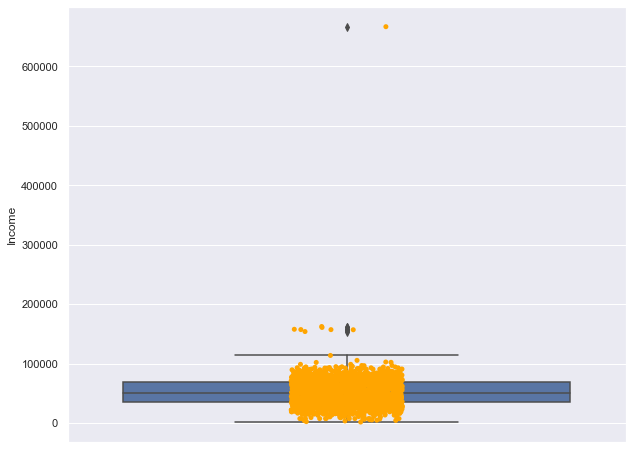

In [8]:
a = df['Income']
a = np.array(a)
# plt.hist(a)
plt.figure(figsize = (10, 8))
sns.set_theme()
sns.boxplot(y = df['Income'])
sns.stripplot(y = df['Income'], color = 'orange')

It seems that there is one major outlier which is very farther than rest of the dataset, so i am removing this point 

In [9]:
df[df['Income'] == max(df['Income'])]

ID  Year_Birth   Education Marital_Status    Income  Kids  Teen  \
2233  9432        1984  Graduation       Together  666666.0     1     0   

     Customer_Dt  Last_purchase  Wines  ...  CatalogPurchases  StorePurchases  \
2233  02-06-2020             23      9  ...                 1               3   

      WebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
2233               6             0             0             0             0   

      AcceptedCmp2  Complain  Response  
2233             0         0         0  

[1 rows x 27 columns]

In [10]:
income_mean = df['Income'].mean()
df.replace(np.nan,income_mean,inplace = True)

In [11]:
df.drop(2233,axis=0,inplace=True)

<AxesSubplot: ylabel='Income'>

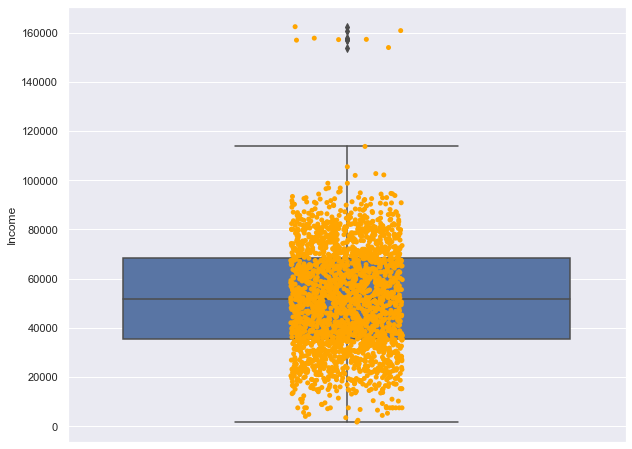

In [12]:
a = df['Income']
a = np.array(a)
plt.figure(figsize = (10, 8))
sns.set_theme()
sns.boxplot(y = df['Income'])
sns.stripplot(y = df['Income'], color = 'orange')

In [13]:
df1 = df.copy()

In [14]:
def change_1(df):
     if df['Marital_Status'] == 'Single':
        return 'Single'
     if df['Marital_Status'] == 'Together':
        return 'Married'
     if df['Marital_Status'] == 'Married':
        return 'Married'
     if df['Marital_Status'] == 'Divorced':
        return 'Single'
     if df['Marital_Status'] == 'Widow':
        return 'Single'
     if df['Marital_Status'] == 'Alone':
        return 'Single'
     if df['Marital_Status'] == 'Absurd':
        return 'Single'
     if df['Marital_Status'] == 'Yolo':
        return 'Single'

In [15]:
df1['Marital_S'] = df1.apply(change_1, axis = 1)

In [16]:
def change_2(df):
    if df['Education'] == 'Basic':
        return 'level 1 Education'
    if df['Education'] == 'Graduation':
        return 'level 1 Education'
    if df['Education'] == 'PhD':
        return 'level 2 Education'
    if df['Education'] == 'Master':
        return 'level 2 Education'
    if df['Education'] == '2n Cycle':
        return 'level 2 Education'

In [17]:
df1['Education'] = df1.apply(change_2, axis = 1)

In [18]:
df1['Customer_Dt'] = pd.to_datetime(df1['Customer_Dt'])

In [19]:
df1['Customer_Dt'] =  [ i.days for i in (datetime.datetime(year = 2022, month = 1, day = 1, hour = 22, minute = 33, second = 49) -df1['Customer_Dt'])]

In [20]:
df1['Age'] = datetime.datetime.today().year - df1['Year_Birth']

In [21]:
def change_4(df):
    if (df['Age'] >= 18 ) and (df['Age'] <= 30):
        return 'Young Adult'
    if  (df['Age'] >= 31 ) and (df['Age'] <= 45):
        return 'Adult'
    if  (df['Age'] > 45 ):
        return 'Old Adult'
    

In [22]:
df1['Age_Cat'] = df1.apply(change_4, axis = 1)

In [23]:
df1['tot_exp'] = df['Wines'] +df['Fruits'] +df['MeatProducts']+df['FishProducts']+df['SweetProducts']+ df['GoldProds']
df1['Kids_Teen'] = df['Kids']+df['Teen']

In [24]:
df1['tot_purchases'] = df1['NumDealsPurchases']+df1['WebPurchases']+df1['CatalogPurchases'] +df1['StorePurchases']

In [25]:
df1['tot_cam'] = df1[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis = 1)

In [26]:
df1.dtypes

ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kids                   int64
Teen                   int64
Customer_Dt            int64
Last_purchase          int64
Wines                  int64
Fruits                 int64
MeatProducts           int64
FishProducts           int64
SweetProducts          int64
GoldProds              int64
NumDealsPurchases      int64
WebPurchases           int64
CatalogPurchases       int64
StorePurchases         int64
WebVisitsMonth         int64
AcceptedCmp3           int64
AcceptedCmp4           int64
AcceptedCmp5           int64
AcceptedCmp1           int64
AcceptedCmp2           int64
Complain               int64
Response               int64
Marital_S             object
Age                    int64
Age_Cat               object
tot_exp                int64
Kids_Teen              int64
tot_purchases          int64
tot_cam                int64
dtype: object

In [27]:
df1.head()

ID  Year_Birth          Education Marital_Status   Income  Kids  Teen  \
0  5524        1964  level 1 Education         Single  58138.0     0     0   
1  2174        1961  level 1 Education         Single  46344.0     1     1   
2  4141        1972  level 1 Education       Together  71613.0     0     0   
3  6182        1991  level 1 Education       Together  26646.0     1     0   
4  5324        1988  level 2 Education        Married  58293.0     1     0   

   Customer_Dt  Last_purchase  Wines  ...  AcceptedCmp2  Complain  Response  \
0          998             58    635  ...             0         0         1   
1          151             38     11  ...             0         0         0   
2          498             26    426  ...             0         0         0   
3           91             26     11  ...             0         0         0   
4          347             94    173  ...             0         0         0   

   Marital_S  Age    Age_Cat  tot_exp  Kids_Teen  tot_purchases  tot_cam  
0     Single   59  Old Adult     1617          0             25        1  
1     Single   62  Old Adult       27          2              6        0  
2    Married   51  Old Adult      776          0             21        0  
3    Married   32      Adult       53          1              8        0  
4    Married   35      Adult      422          1             19        0  

[5 rows x 34 columns]

In [28]:
print(list(df1.columns))

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kids', 'Teen', 'Customer_Dt', 'Last_purchase', 'Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'WebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Marital_S', 'Age', 'Age_Cat', 'tot_exp', 'Kids_Teen', 'tot_purchases', 'tot_cam']


In [29]:
df2 = pd.get_dummies(df1[['Marital_S', 'Education', 'Age_Cat']])

In [30]:
df3 = pd.concat([df1, df2], axis = 1)

In [31]:
df3.dtypes

ID                               int64
Year_Birth                       int64
Education                       object
Marital_Status                  object
Income                         float64
Kids                             int64
Teen                             int64
Customer_Dt                      int64
Last_purchase                    int64
Wines                            int64
Fruits                           int64
MeatProducts                     int64
FishProducts                     int64
SweetProducts                    int64
GoldProds                        int64
NumDealsPurchases                int64
WebPurchases                     int64
CatalogPurchases                 int64
StorePurchases                   int64
WebVisitsMonth                   int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                 

In [32]:
df3.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kids',
       'Teen', 'Customer_Dt', 'Last_purchase', 'Wines', 'Fruits',
       'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds',
       'NumDealsPurchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'WebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Marital_S', 'Age', 'Age_Cat', 'tot_exp', 'Kids_Teen', 'tot_purchases',
       'tot_cam', 'Marital_S_Married', 'Marital_S_Single',
       'Education_level 1 Education', 'Education_level 2 Education',
       'Age_Cat_Adult', 'Age_Cat_Old Adult', 'Age_Cat_Young Adult'],
      dtype='object')

In [33]:
del df3['Marital_Status']
del df3['Education']
del df3['Kids']
del df3['Teen']
del df3['Wines']
del df3['Fruits']
del df3['MeatProducts']
del df3['FishProducts']
del df3['SweetProducts']
del df3['GoldProds']
del df3['NumDealsPurchases']
del df3['WebPurchases']
del df3['CatalogPurchases']
del df3['StorePurchases']
del df3['AcceptedCmp1']
del df3['AcceptedCmp2']
del df3['AcceptedCmp3']
del df3['AcceptedCmp4']
del df3['AcceptedCmp5']
del df3['Response']
del df3['Age']
del df3['Marital_S']
del df3['Age_Cat']

In [34]:
ss1 = pd.DataFrame(df3.dtypes)[0:9]
ss2 = pd.DataFrame(df3.dtypes)[9:19]

In [35]:
ss1.reset_index(inplace = True)
ss2.reset_index(inplace = True)

In [36]:
ss =pd.concat([ss1, ss2],  axis = 1)

In [37]:
ss

index        0                        index      0
0              ID    int64                tot_purchases  int64
1      Year_Birth    int64                      tot_cam  int64
2          Income  float64            Marital_S_Married  uint8
3     Customer_Dt    int64             Marital_S_Single  uint8
4   Last_purchase    int64  Education_level 1 Education  uint8
5  WebVisitsMonth    int64  Education_level 2 Education  uint8
6        Complain    int64                Age_Cat_Adult  uint8
7         tot_exp    int64            Age_Cat_Old Adult  uint8
8       Kids_Teen    int64          Age_Cat_Young Adult  uint8

In [38]:
ss.rename(columns = {'index':'column_name', 0:'dtype'}, inplace = True)

In [39]:
ss

column_name    dtype                  column_name  dtype
0              ID    int64                tot_purchases  int64
1      Year_Birth    int64                      tot_cam  int64
2          Income  float64            Marital_S_Married  uint8
3     Customer_Dt    int64             Marital_S_Single  uint8
4   Last_purchase    int64  Education_level 1 Education  uint8
5  WebVisitsMonth    int64  Education_level 2 Education  uint8
6        Complain    int64                Age_Cat_Adult  uint8
7         tot_exp    int64            Age_Cat_Old Adult  uint8
8       Kids_Teen    int64          Age_Cat_Young Adult  uint8

In [40]:
def change_3(df):
    if df.corr() > 0.7:
        return "background: red"

In [41]:
corr_matrix = df3.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.replace(np.nan,0,inplace = True)
upper.style.apply(lambda x: ["background: orange" if v > 0.7 else "" for v in x], axis = 1)

It is observed that total purchases is moderately correlated with total expenses , so tot_purcahses is removed 

In [42]:
del df3['tot_purchases']

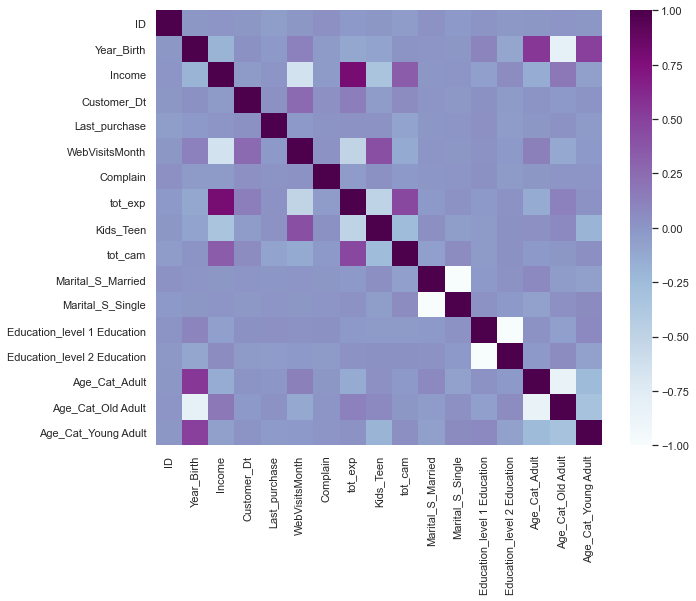

In [43]:
plt.figure(figsize = (10, 8))
sns.heatmap(df3.corr(), cmap="BuPu")
plt.savefig('heatmap.png')

### Education vs avg_income

In [44]:
level_1_education_arr = np.array(df1[df1['Education'] == 'level 1 Education']['Income'])
level_2_education_arr = np.array(df1[df1['Education'] == 'level 2 Education']['Income'])                            

In [45]:
df1.groupby(['Education']).agg(avg_income = ('Income', np.median))

avg_income
Education                      
level 1 Education  50442.000000
level 2 Education  52247.251354

Here we have two categories of income , level 1 category belongs to those people who have education graduation or basic, level 2 education belongs to rest of the other people.Now we can do **t-test**  on this to check whether this two groups come from differnt population or not.In the following t test I used 0.05 significance level.


**H0** : Both the distributions have same mean $\mu_1 = \mu_2 $

**H1** : Both the distributions have different mean  $\mu_1$ is not equal to  $\mu_2 $

In [46]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.displot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=2)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

Text(55783.54376388209, 1.4933185336151939e-05, 'Mean: 50712.31')

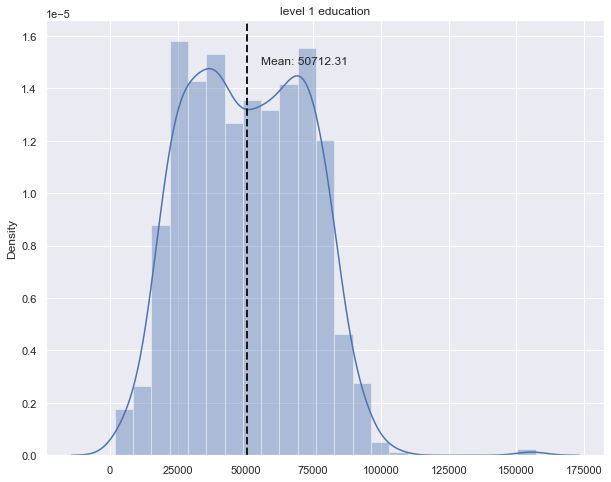

In [47]:
plt.title('level 1 education')
sns.distplot(np.array(df1[df1['Education'] == 'level 1 Education']['Income']))
plt.axvline(np.mean(level_1_education_arr), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(level_1_education_arr) + np.mean(level_1_education_arr) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(level_1_education_arr)))

Text(58715.12095784628, 1.8407766519320593e-05, 'Mean: 53377.38')

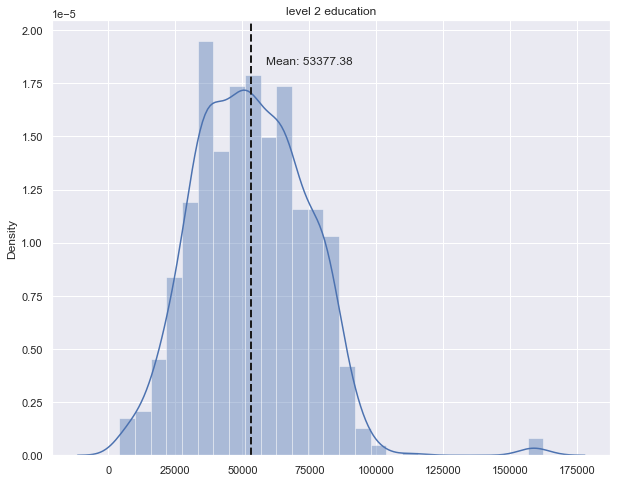

In [48]:
plt.figure(figsize = (10, 8))
plt.title('level 2 education')
sns.distplot(np.array(df1[df1['Education'] == 'level 2 Education']['Income']))
plt.axvline(np.mean(level_2_education_arr), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(level_2_education_arr) + np.mean(level_2_education_arr) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(level_2_education_arr)))

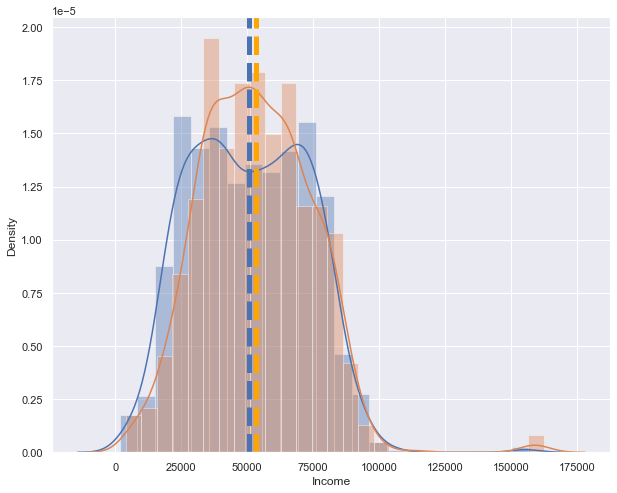

In [49]:
plt.figure()
ax1 = sns.distplot(df1[df1['Education'] == 'level 1 Education']['Income'])
ax2 = sns.distplot(df1[df1['Education'] == 'level 2 Education']['Income'])
plt.axvline(np.mean(np.array(df1[df1['Education'] == 'level 1 Education']['Income'])), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(np.array(df1[df1['Education'] == 'level 2 Education']['Income'])), color='orange', linestyle='dashed', linewidth=5)

In [50]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [51]:
print('level_1_education_arr:',  len(level_1_education_arr))
print('level_2_education_arr:' , len(level_2_education_arr))

level_1_education_arr: 1180
level_2_education_arr: 1059


In [52]:
level1_sampled = np.random.choice(level_1_education_arr, 118, replace = False)
level2_sampled = np.random.choice(level_2_education_arr, 105, replace = False)
ttest_ind(level1_sampled, level2_sampled)

Ttest_indResult(statistic=-1.070392866634195, pvalue=0.285610129194504)

In [53]:
sample_size = 200
count = 0
for i in range(1000):
    level1_sampled = np.random.choice(level_1_education_arr, 118, replace = False)
    level2_sampled = np.random.choice(level_2_education_arr, 105, replace = False)
    t, p = ttest_ind(level1_sampled, level2_sampled)
    #print(p)
    if p > 0.05:
        count += 1
#compare_2_groups(level1_sampled, level2_sampled, 0.05, sample_size)
print(count)

870


Here we can clearly see that p value is greater than the significance level and it indicates that both the population has same mean.So we can say that average income of the given data set is around 52k irrespective of level 1 or level 2 education

### Education_vs_tot_exp

In [54]:
level_1_education_exp = np.array(df1[df1['Education'] == 'level 1 Education']['tot_exp'])
level_2_education_exp = np.array(df1[df1['Education'] == 'level 2 Education']['tot_exp']) 

In [55]:
df1.groupby(['Education']).agg(avg_exp = ('tot_exp', np.mean))

avg_exp
Education                    
level 1 Education  595.746610
level 2 Education  617.511804

Text(655.3212711864406, 0.002118637339272377, 'Mean: 595.75')

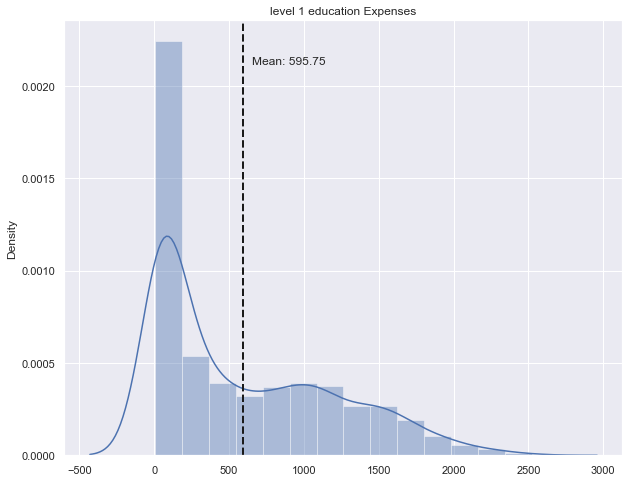

In [56]:
plt.figure(figsize = (10, 8))
plt.title('level 1 education Expenses')
sns.distplot(level_1_education_exp)
plt.axvline(np.mean(level_1_education_exp), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(level_1_education_exp) + np.mean(level_1_education_exp) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(level_1_education_exp)))

Text(679.2629839471199, 0.0020300371074427606, 'Mean: 617.51')

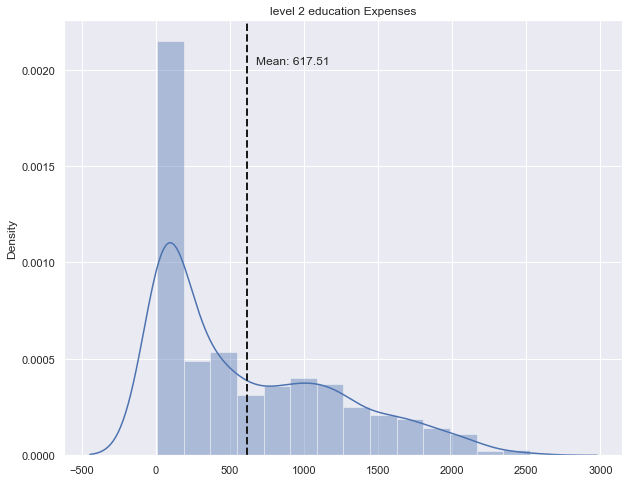

In [57]:
plt.figure(figsize = (10, 8))
plt.title('level 2 education Expenses')
sns.distplot(level_2_education_exp)
plt.axvline(np.mean(level_2_education_exp), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(level_2_education_exp) + np.mean(level_2_education_exp) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(level_2_education_exp)))

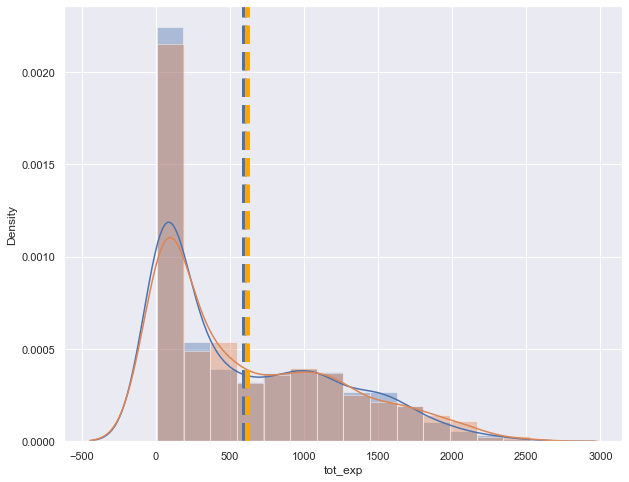

In [58]:
plt.figure()
ax1 = sns.distplot(df1[df1['Education'] == 'level 1 Education']['tot_exp'])
ax2 = sns.distplot(df1[df1['Education'] == 'level 2 Education']['tot_exp'])
plt.axvline(np.mean(np.array(df1[df1['Education'] == 'level 1 Education']['tot_exp'])), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(np.array(df1[df1['Education'] == 'level 2 Education']['tot_exp'])), color='orange', linestyle='dashed', linewidth=5)

In [59]:
from scipy.stats import mannwhitneyu

In [60]:
print('level_1_education_exp:', len(level_1_education_exp))
print('level_2_education_exp :', len(level_2_education_exp))

level_1_education_exp: 1180
level_2_education_exp : 1059


In [61]:
level1_sampled = np.random.choice(level_1_education_exp, sample_size, replace = False)
level2_sampled = np.random.choice(level_2_education_exp, sample_size, replace = False)
mannwhitneyu(level1_sampled, level2_sampled)

MannwhitneyuResult(statistic=19540.0, pvalue=0.34551884672694155)

In [62]:
count1 = 0
for i in range(1000):
    level1_sampled = np.random.choice(level_1_education_exp, 118, replace = False)
    level2_sampled = np.random.choice(level_2_education_exp, 105, replace = False)
    t, p = mannwhitneyu(level1_sampled, level2_sampled)
    if p > 0.05:
        count1 += 1
print(count1)

892


In [63]:
df3['tot_exp'].mean()

606.0410897722197

### avg_exp vs Marital_Status

We can perform same test as above in order to check whether expenses or more for single than married. The same significance 
value is used to check the hypothesis.



In [64]:
single_total_exp = np.array(df1[df1['Marital_S'] == 'Single']['tot_exp'])
married_total_exp = np.array(df1[df1['Marital_S'] == 'Married']['tot_exp'])  

In [65]:
df1.groupby(['Marital_S']).agg(avg_exp = ('tot_exp', np.mean))

avg_exp
Marital_S            
Married    598.237006
Single     620.682620

Text(682.7508816120907, 0.001853274559193955, 'Mean: 620.68')

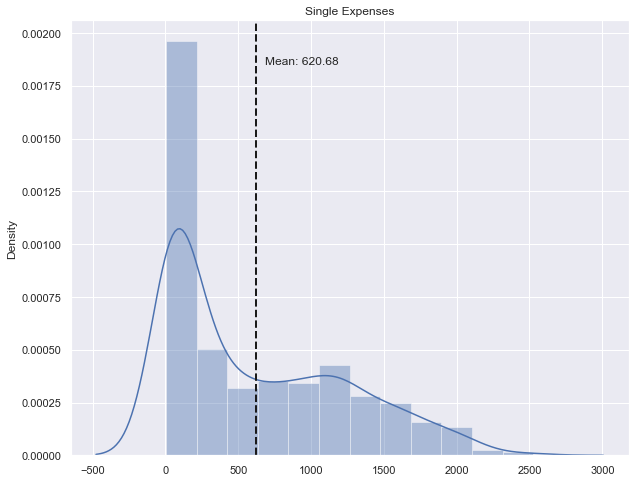

In [66]:
plt.figure(figsize = (10, 8))
plt.title('Single Expenses')
sns.distplot(single_total_exp)
plt.axvline(np.mean(single_total_exp), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(single_total_exp) + np.mean(single_total_exp) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(single_total_exp)))

Text(658.0607068607068, 0.002174709716442626, 'Mean: 598.24')

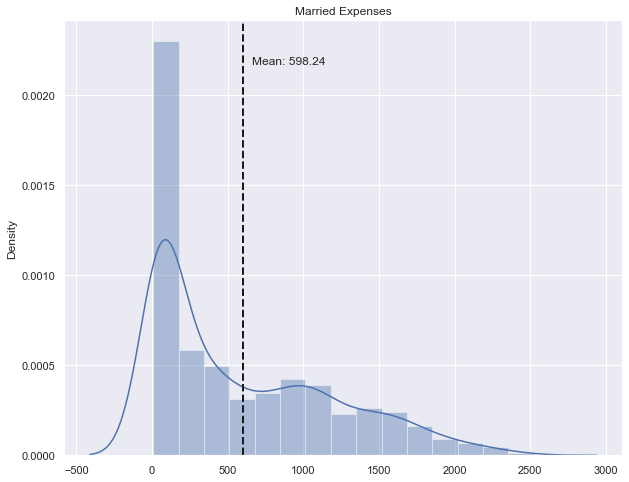

In [67]:
plt.figure(figsize = (10, 8))
plt.title('Married Expenses')
sns.distplot(married_total_exp)
plt.axvline(np.mean(married_total_exp), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(married_total_exp) + np.mean(married_total_exp) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(married_total_exp)))

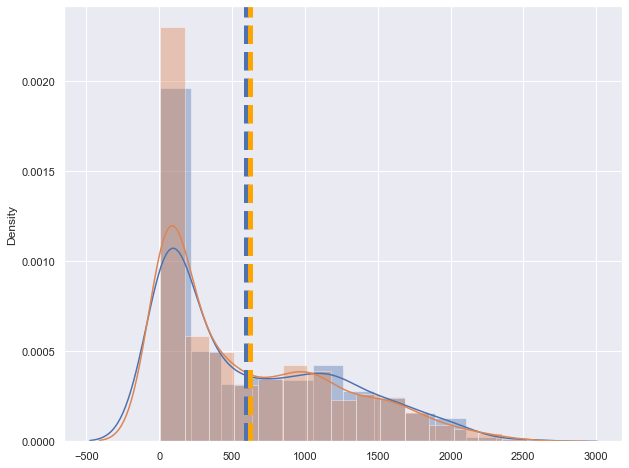

In [68]:
plt.figure()
ax1 = sns.distplot(single_total_exp)
ax2 = sns.distplot(married_total_exp)
plt.axvline(np.mean(married_total_exp), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(single_total_exp), color='orange', linestyle='dashed', linewidth=5)

In [69]:
print('single_total_exp:', len(single_total_exp))
print('married_total_exp:', len(married_total_exp))

single_total_exp: 794
married_total_exp: 1443


In [70]:
count2 = 0
for i in range(1000):
    single_sampled = np.random.choice(single_total_exp, 79, replace = False)
    married_sampled = np.random.choice(married_total_exp, 144, replace = False)
    t, p = mannwhitneyu(single_sampled, married_sampled)
    if p > 0.05:
        count2 += 1
print(count2)

917


In [71]:
single_sampled = np.random.choice(single_total_exp, 79)
married_sampled = np.random.choice(married_total_exp, 144)
mannwhitneyu(single_sampled, married_sampled)

MannwhitneyuResult(statistic=5146.5, pvalue=0.12019067942757733)

here also we conclude that both the distributions belong to same population and on a averege a person spends 606$ 

###  Age vs expenses

In [72]:
df1.groupby([ 'Age_Cat']).agg(avg_exp = ('tot_exp', np.mean))

avg_exp
Age_Cat                
Adult        505.580825
Old Adult    676.892454
Young Adult  650.597884

In [73]:
adult = np.array(df1[df1['Age_Cat'] == 'Adult']['tot_exp'])
old_adult = np.array(df1[df1['Age_Cat'] == 'Old Adult']['tot_exp'])
young_adult = np.array(df1[df1['Age_Cat'] == 'Young Adult']['tot_exp'])

Text(556.1389074693423, 403.51500000000004, 'Mean: 505.58')

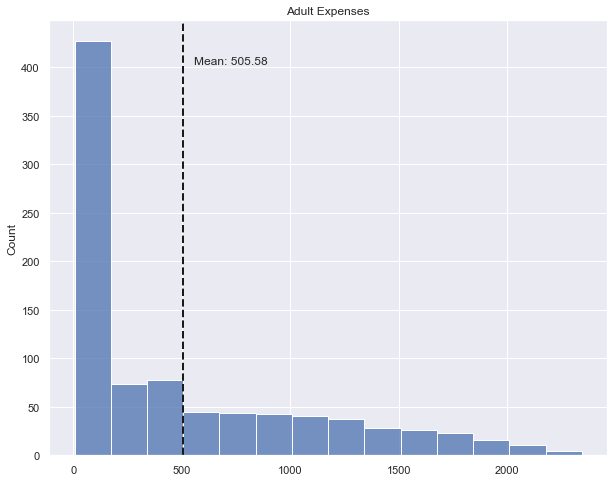

In [74]:
plt.figure(figsize = (10, 8))
plt.title('Adult Expenses')
sns.histplot(adult)
plt.axvline(np.mean(adult), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(adult) + np.mean(adult) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(adult)))

Text(744.5816999132696, 329.805, 'Mean: 676.89')

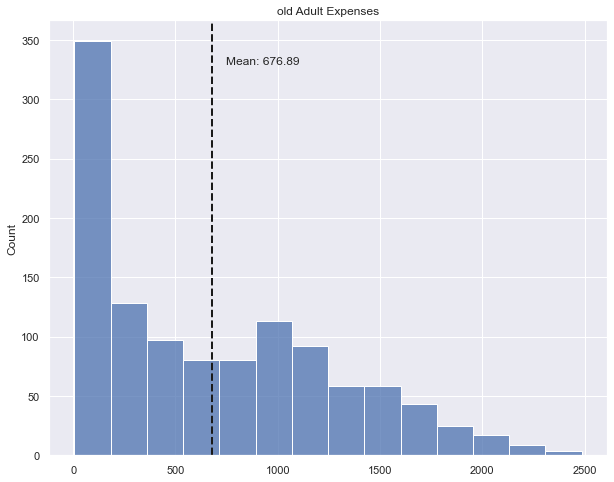

In [75]:
plt.figure(figsize = (10, 8))
plt.title('old Adult Expenses')
sns.histplot(old_adult)
plt.axvline(np.mean(old_adult), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(old_adult) + np.mean(old_adult) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(old_adult)))

Text(715.657671957672, 95.445, 'Mean: 650.60')

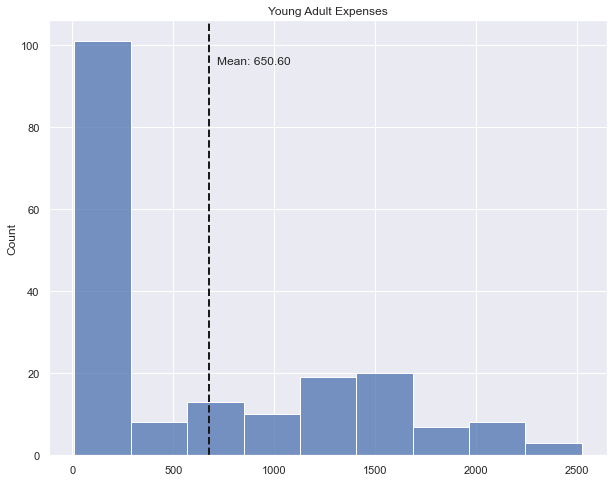

In [76]:
plt.figure(figsize = (10, 8))
plt.title('Young Adult Expenses')
sns.histplot(young_adult)
plt.axvline(np.mean(old_adult), color="k", linestyle="dashed", linewidth=2)
max_ = plt.ylim()[1]
plt.text(np.mean(young_adult) + np.mean(young_adult) / 10,max_ - max_ / 10, "Mean: {:.2f}".format(np.mean(young_adult)))

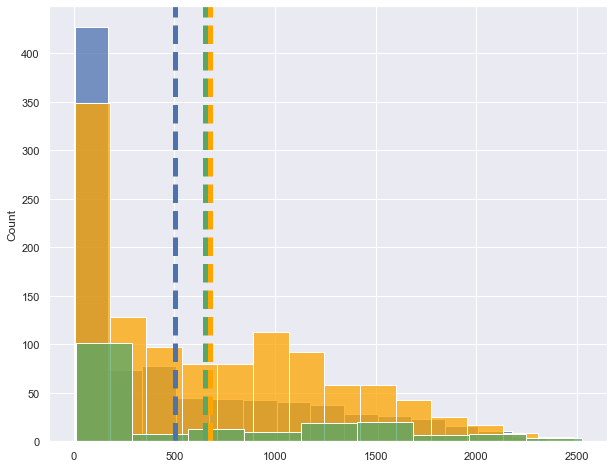

In [77]:
plt.figure()
ax1 = sns.histplot(adult, color = 'b')
ax2 = sns.histplot(old_adult, color = 'orange')
ax3 = sns.histplot(young_adult, color = 'g')
plt.axvline(np.mean(adult), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(old_adult), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(young_adult), color='g', linestyle='dashed', linewidth=5)

In [78]:
print('adult:' , len(adult))
print('old adult:', len(old_adult))
print('young adult :', len(young_adult))

adult: 897
old adult: 1153
young adult : 189


In [79]:
import scipy.stats as aa
import statsmodels.api as sa
import scikit_posthocs as sp

In [80]:
count3 = 0
for i in range(1000):
    adult_sample = np.random.choice(adult, 89)
    old_adult_sample = np.random.choice(old_adult, 200)
    young_adult_sample = np.random.choice(young_adult, 21)
    t, p = aa.kruskal(adult_sample, old_adult_sample, young_adult_sample)
    if p > 0.05:
        count3 += 1
print(count3)

314


In [81]:
adult_sample = np.random.choice(adult, 89, replace = False)
old_adult_sample = np.random.choice(old_adult, 200, replace = False)
young_adult_sample = np.random.choice(young_adult, 21, replace = False)
aa.kruskal(adult_sample, old_adult_sample, young_adult_sample)

KruskalResult(statistic=2.3685706859840443, pvalue=0.30596476124473815)

In [82]:
s = df1.sample(n = 600, replace = False)
sp.posthoc_scheffe(df1, val_col='tot_exp', group_col='Age_Cat')

Old Adult         Adult  Young Adult
Old Adult    1.000000e+00  1.143050e-09     0.854224
Adult        1.143050e-09  1.000000e+00     0.010071
Young Adult  8.542240e-01  1.007078e-02     1.000000

### Plots 

In [83]:
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact
import ipywidgets as wdg

In [84]:
type_pur = ['NumDealsPurchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases']

In [85]:
purchases = df1.groupby([ 'Age_Cat']).agg({ 'NumDealsPurchases': 'sum','WebPurchases': 'sum' ,'CatalogPurchases':'sum', 'StorePurchases':'sum' })

In [86]:
purchases = purchases.T

In [87]:
purchases

Age_Cat            Adult  Old Adult  Young Adult
NumDealsPurchases   2113       2788          303
WebPurchases        3347       5150          650
CatalogPurchases    1979       3469          514
StorePurchases      4735       7176         1056

In [88]:
purchases.columns

Index(['Adult', 'Old Adult', 'Young Adult'], dtype='object', name='Age_Cat')

In [89]:
fig = px.scatter(purchases,  y = purchases.columns[1:5] )

fig.show()

In [90]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kids',
       'Teen', 'Customer_Dt', 'Last_purchase', 'Wines', 'Fruits',
       'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds',
       'NumDealsPurchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'WebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [91]:
items = df1.groupby([ 'Age_Cat']).agg({ 'Wines': 'sum','Fruits': 'sum' ,'MeatProducts':'sum', 'FishProducts':'sum', 'SweetProducts':'sum' , 'GoldProds' :'sum'})

<AxesSubplot: xlabel='Age_Cat'>

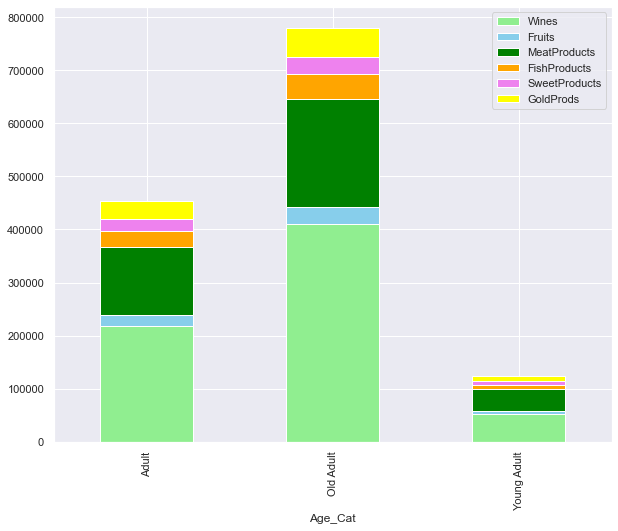

In [92]:
items.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue', 'green', 'orange', 'violet', 'yellow'])

In [93]:
fig = px.bar(items, y=items.columns[0:7], title="Amount Spending on different Products")
fig.show()

In [94]:
items.T.to_csv('items.csv')

In [95]:
items

Wines  Fruits  MeatProducts  FishProducts  SweetProducts  \
Age_Cat                                                                  
Adult        217954   20615        128876         29838          21795   
Old Adult    411139   32089        203389         46139          32331   
Young Adult   51714    6199         41685          8072           6494   

             GoldProds  
Age_Cat                 
Adult            34428  
Old Adult        55370  
Young Adult       8799

In [96]:
items.T.sort_values(by=['Adult', 'Old Adult', 'Young Adult'])

Age_Cat         Adult  Old Adult  Young Adult
Fruits          20615      32089         6199
SweetProducts   21795      32331         6494
FishProducts    29838      46139         8072
GoldProds       34428      55370         8799
MeatProducts   128876     203389        41685
Wines          217954     411139        51714

### Gold 

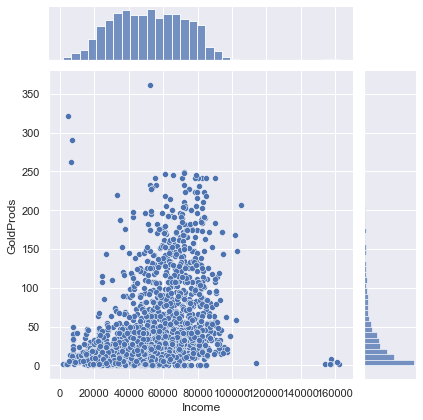

In [97]:
sns.jointplot(x = 'Income', y = 'GoldProds', data = df1)

In [98]:
fig = px.box(df1, y = 'GoldProds')
fig.show()

In [99]:
print('The number of people who are spending more than 24 on gold products are', len(list(df1[df1['GoldProds']> 24]['Income'] > df1['Income'].mean())), 
     'out of this the number the number of people whose income is greater than average income are ', sum(list(df1[df1['GoldProds']> 24]['Income'] > df1['Income'].mean())))


The number of people who are spending more than 24 on gold products are 1116 out of this the number the number of people whose income is greater than average income are  800


In [100]:
print('The number of people who are spending more than 56 on gold products are', len(list(df1[df1['GoldProds']> 56]['Income'] > df1['Income'].mean())), 
     'out of this the number the number of people whose income is greater than average income are ', sum(list(df1[df1['GoldProds']> 56]['Income'] > df1['Income'].mean())))


The number of people who are spending more than 56 on gold products are 558 out of this the number the number of people whose income is greater than average income are  464


In [101]:
print('The number of people who are spending more than 126 on gold products are', len(list(df1[df1['GoldProds']> 126]['Income'] > df1['Income'].mean())), 
     'out of this the number the number of people whose income is greater than average income are ', sum(list(df1[df1['GoldProds']> 126]['Income'] > df1['Income'].mean())))


The number of people who are spending more than 126 on gold products are 207 out of this the number the number of people whose income is greater than average income are  185


In [102]:
df1['isIncome']= ['Income > Average' if i > df1['Income'].mean() else 'Income < Average' for i in df1.Income.values]

Text(0.5, 1.0, 'Scatter plot on expenses on Gold > 126')

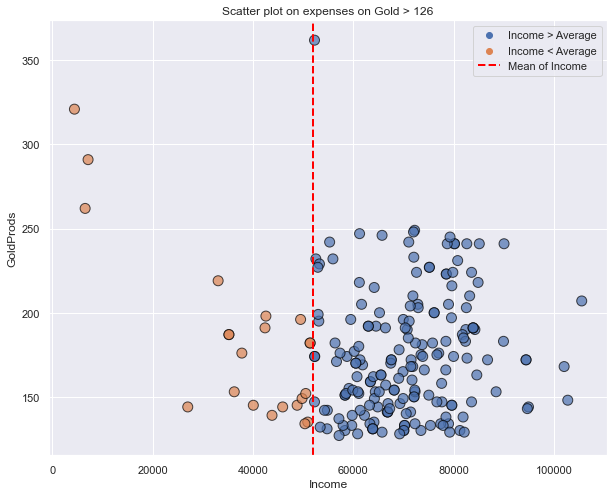

In [103]:
sns.scatterplot('Income', 'GoldProds', data = df1[df1['GoldProds'] > 126], hue = 'isIncome', s = 100, alpha = 0.7, linewidth = 1, edgecolor = 'black')
plt.axvline(np.mean(df1['Income']), color="red", linestyle="dashed", linewidth=2, label = 'Mean of Income')
plt.legend()
plt.title('Scatter plot on expenses on Gold > 126')

### Wines 

In [104]:
df1['Wines'].value_counts()

2       42
5       40
6       37
1       37
4       33
        ..
952      1
948      1
944      1
940      1
1493     1
Name: Wines, Length: 776, dtype: int64

In [105]:
fig = px.box(df1, y = 'Wines')
fig.show()

Text(0.5, 1.0, 'Scatter plot on expenses on wine > 500')

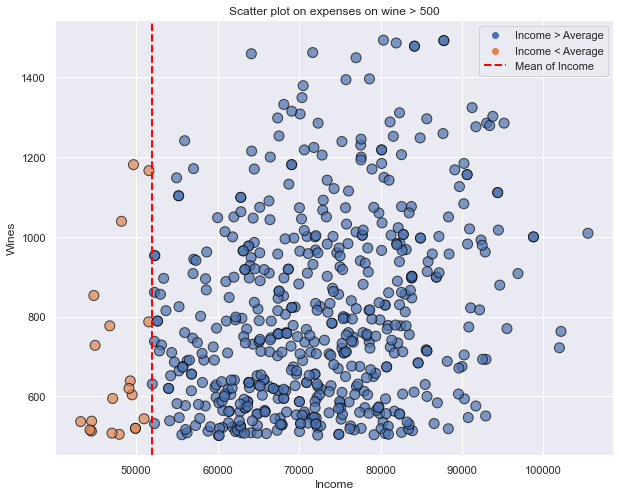

In [106]:
sns.scatterplot(x = 'Income', y = 'Wines', data = df1[df1['Wines'] > 500], hue = 'isIncome', s = 100, alpha = 0.7, linewidth = 1, edgecolor = 'black')
plt.axvline(np.mean(df1['Income']), color="red", linestyle="dashed", linewidth=2, label = 'Mean of Income')
plt.legend()
plt.title('Scatter plot on expenses on wine > 500')

### Meat Products

In [107]:
df1['MeatProducts'].value_counts()

7      53
5      50
11     49
8      46
6      43
       ..
221     1
227     1
231     1
233     1
0       1
Name: MeatProducts, Length: 558, dtype: int64

In [108]:
fig = px.box(df1, y = 'MeatProducts')
fig.show()

Text(0.5, 1.0, 'Scatter plot on expenses on MeatProducst > 232')

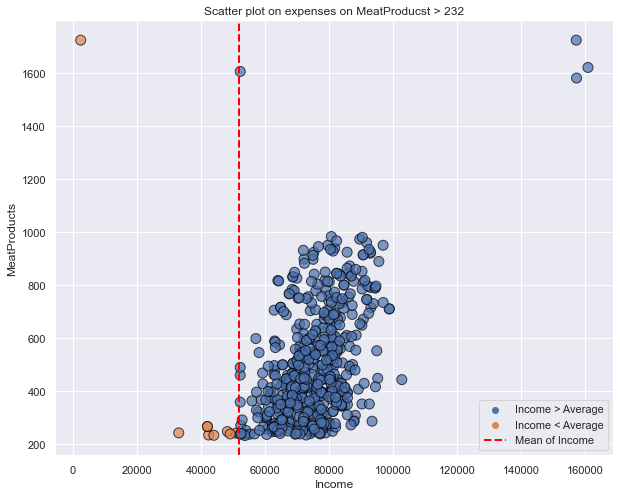

In [109]:
sns.scatterplot(x = 'Income', y = 'MeatProducts', data = df1[df1['MeatProducts'] > 232], hue = 'isIncome', s = 100, alpha = 0.7, linewidth = 1, edgecolor = 'black')
plt.axvline(np.mean(df1['Income']), color="red", linestyle="dashed", linewidth=2, label = 'Mean of Income')
plt.legend()
plt.title('Scatter plot on expenses on MeatProducst > 232')

###  Campaign 

In [110]:
camp_data = [df['AcceptedCmp1'].sum(), df['AcceptedCmp2'].sum(), df['AcceptedCmp3'].sum(), 
             df['AcceptedCmp4'].sum(), df['AcceptedCmp5'].sum(), df['Response'].sum()]
cam_labels = ['camp1', 'camp2', 'camp3', 'camp4', 'camp5' , 'camp6']
palette_color = sns.color_palette('Accent_r')

([<matplotlib.patches.Wedge at 0x24f91ebdbe0>,
 [Text(0.9895629883931121, 0.48038015363094866, 'camp1'),
  Text(0.5961563318215788, 0.9244444969975428, 'camp2'),
  Text(-0.036242540122103, 1.0994027825530996, 'camp3'),
  Text(-0.9642033020087536, 0.5294449852396532, 'camp4'),
  Text(-0.9471148865352133, -0.5594402485550986, 'camp5'),
  Text(0.5490030105467242, -0.9532028611007385, 'camp6')],
 [Text(0.5397616300326065, 0.2620255383441538, '14%'),
  Text(0.32517618099358836, 0.5042424529077506, '3%'),
  Text(-0.019768658248419817, 0.5996742450289634, '16%'),
  Text(-0.5259290738229564, 0.28878817376708354, '17%'),
  Text(-0.516608119928298, -0.30514922648459913, '16%'),
  Text(0.2994561875709404, -0.5199288333276755, '33%')])

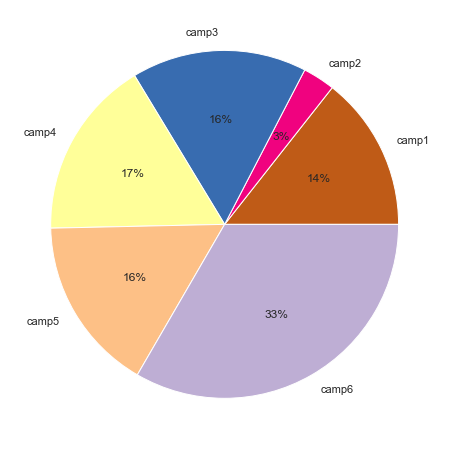

In [111]:
plt.pie(camp_data, labels= cam_labels, colors = palette_color, autopct='%.0f%%')

## Principal Component Analysis

In [112]:
X = df3.iloc[:, :].values

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)

In [114]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)

In [115]:
pca.explained_variance_ratio_.shape

(17,)

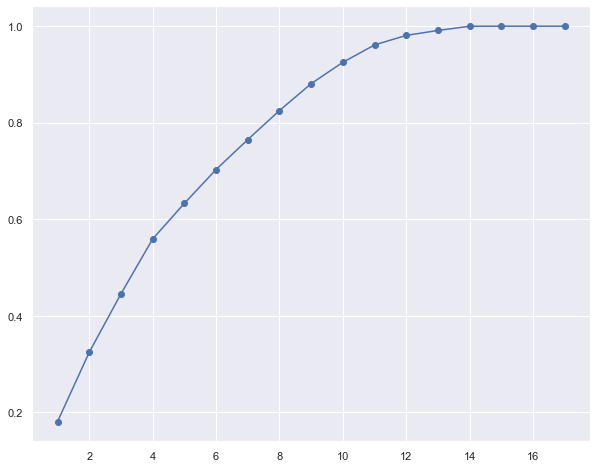

In [116]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = 'o')

in order to preserve 80 % variance we need to have 8 components in PCA. We can try and eliminate some columns to reduce this 


In [117]:
df4 = df3.copy()

In [118]:
df4.columns

Index(['ID', 'Year_Birth', 'Income', 'Customer_Dt', 'Last_purchase',
       'WebVisitsMonth', 'Complain', 'tot_exp', 'Kids_Teen', 'tot_cam',
       'Marital_S_Married', 'Marital_S_Single', 'Education_level 1 Education',
       'Education_level 2 Education', 'Age_Cat_Adult', 'Age_Cat_Old Adult',
       'Age_Cat_Young Adult'],
      dtype='object')

In [119]:
del df4['ID']
del df4['Year_Birth']
del df4['Customer_Dt']
del df4['Last_purchase']

In [120]:
del df4['WebVisitsMonth']
del df4['Complain']
del df4['tot_cam']


In [121]:
del df4['Kids_Teen']


In [122]:
del df4['Education_level 1 Education']
del df4['Education_level 2 Education']

In [123]:
X = df4.iloc[:, :].values

In [124]:
X_train = sc.fit_transform(X)

In [125]:
X_train = pca.fit_transform(X_train)

In [126]:
pca.explained_variance_ratio_.shape

(7,)

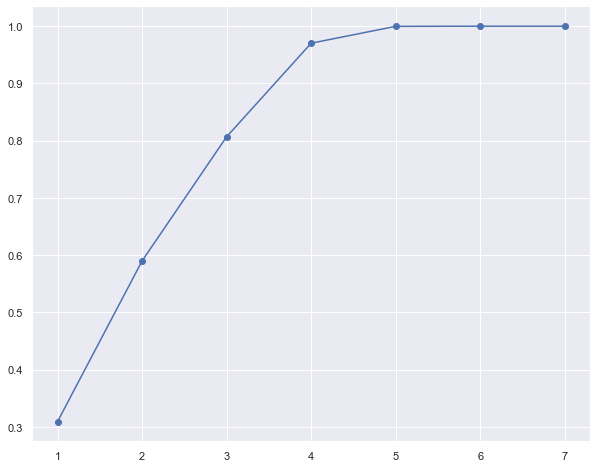

In [127]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker = 'o')

In [128]:
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)

## Kmeans Clustering

In [129]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [130]:
wcss = []
for i in range(4,50):
      kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state  = 42)
      kmeans_pca.fit(X_train)
      silhouette_score_average = silhouette_score(X_train,   kmeans_pca.predict(X_train))

        #lets see what that score it
      print('the score for {} clusters is '.format(i), silhouette_score_average)
      wcss.append(kmeans_pca.inertia_)

the score for 4 clusters is  0.5094130407596631
the score for 5 clusters is  0.5341039571283124
the score for 6 clusters is  0.551647215350874
the score for 7 clusters is  0.571845361584688
the score for 8 clusters is  0.6003076028891172
the score for 9 clusters is  0.5836261326791001
the score for 10 clusters is  0.5558456133674117
the score for 11 clusters is  0.5461030961461951
the score for 12 clusters is  0.5558558586990296
the score for 13 clusters is  0.548795804826139
the score for 14 clusters is  0.5451268125878773
the score for 15 clusters is  0.5448291270104818
the score for 16 clusters is  0.5595426229589122
the score for 17 clusters is  0.5526124194238802
the score for 18 clusters is  0.5617560836214832
the score for 19 clusters is  0.5647672172972311
the score for 20 clusters is  0.561025662079358
the score for 21 clusters is  0.5595439075911426
the score for 22 clusters is  0.5501498763041801
the score for 23 clusters is  0.547308432885007
the score for 24 clusters is  0

In [131]:
kmeans_pca = KMeans(n_clusters = 8, init = 'k-means++', random_state  = 42)

In [132]:
kmeans_pca.fit(X_train)

KMeans(random_state=42)

In [133]:
final_df = pd.concat([df4.reset_index(drop = True), pd.DataFrame(X_train)], axis = 1)

In [134]:
final_df.columns.values[-3:] = ['comp_1','comp_2', 'comp_3' ]

In [135]:
final_df

Income  tot_exp  Marital_S_Married  Marital_S_Single  Age_Cat_Adult  \
0     58138.0     1617                  0                 1              0   
1     46344.0       27                  0                 1              0   
2     71613.0      776                  1                 0              0   
3     26646.0       53                  1                 0              1   
4     58293.0      422                  1                 0              1   
...       ...      ...                ...               ...            ...   
2234  61223.0     1341                  1                 0              0   
2235  64014.0      444                  1                 0              0   
2236  56981.0     1241                  0                 1              1   
2237  69245.0      843                  1                 0              0   
2238  52869.0      172                  1                 0              0   

      Age_Cat_Old Adult  Age_Cat_Young Adult    comp_1    comp_2    comp_3  
0                     1                    0  2.561852  0.612137  0.359586  
1                     1                    0  1.341857  1.533717 -1.308098  
2                     1                    0  0.769625 -1.678307 -0.380901  
3                     0                    0 -2.409326  0.179744 -0.124959  
4                     0                    0 -1.598104 -0.451499  0.934749  
...                 ...                  ...       ...       ...       ...  
2234                  1                    0  0.936798 -1.795284 -0.127568  
2235                  1                    0  0.421059 -1.411723 -0.848635  
2236                  0                    0  0.402403  1.673745  1.938969  
2237                  1                    0  0.768699 -1.675779 -0.377290  
2238                  1                    0  0.045627 -1.122299 -1.346303  

[2239 rows x 10 columns]

In [136]:
final_df['labels'] =kmeans_pca.labels_

In [137]:
final_df[final_df['labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0]

1       1.341857
13      1.758306
25      0.865188
33      1.520460
35      1.421487
          ...   
2210    1.570394
2212    1.201797
2224    1.960166
2227    1.832794
2231    1.959386
Name: comp_1, Length: 229, dtype: float64

In [138]:
final_df['Marital_S'] = df1['Marital_S']

In [139]:
final_df['Age_Cat'] = df1['Age_Cat']

In [140]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
final_df['Age_labels'] = le.fit_transform(final_df['Age_Cat'])

In [141]:
# fig = plt.figure(figsize = (15,10))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(final_df[final_df['labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 100 , color = 'blue', alpha = 0.5, linewidth = 2 , edgecolor = 'blue', label = "cluster 0: {}".format(final_df[final_df['labels'] == 0].shape[0]))
# ax.scatter(final_df[final_df['labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'red', label = "cluster 1:{}".format(final_df[final_df['labels'] == 1].shape[0]))
# ax.scatter(final_df[final_df['labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'green', label = "cluster 2:{}".format(final_df[final_df['labels'] == 2].shape[0]))
# ax.scatter(final_df[final_df['labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'yellow', label = "cluster 3:{}".format(final_df[final_df['labels'] == 3].shape[0]))
# ax.scatter(final_df[final_df['labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'purple', label = "cluster 4:{}".format(final_df[final_df['labels'] == 4].shape[0]))
# ax.scatter(final_df[final_df['labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'orange', label = "cluster 5:{}".format(final_df[final_df['labels'] == 5].shape[0]))
# ax.scatter(final_df[final_df['labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'pink', label = "cluster 6:{}".format(final_df[final_df['labels'] == 6].shape[0]))
# ax.scatter(final_df[final_df['labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
#            final_df[final_df['labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'brown', label = "cluster 7:{}".format(final_df[final_df['labels'] == 7].shape[0]))
# ax.set_xlabel('comp_1-->')
# ax.set_ylabel('comp_2-->')
# ax.set_zlabel('comp_3-->')
# ax.legend()

# plt.show()

In [142]:
final_df["labels"] = final_df["labels"].astype(str)
fig = px.scatter_3d(final_df, x = 'comp_1', y = 'comp_2', z = 'comp_3', color = 'labels', width = 1000, height = 600)
fig.show()

In [143]:
fig = px.scatter(final_df, x = 'comp_1',y = 'comp_2',  color = 'labels')
fig.show()

In [144]:
fig = px.scatter(final_df, x = 'comp_1',y = 'Income',  color = 'labels')
fig.add_hline(y =df['Income'].mean())
fig.show()

In [145]:
fig = px.scatter(final_df, x = 'comp_1',y = 'tot_exp',  color = 'labels')
fig.add_hline(y =1000)
fig.show()

In [146]:
df1['Age_Cat'].value_counts()

Old Adult      1153
Adult           897
Young Adult     189
Name: Age_Cat, dtype: int64

In [147]:
final_df

Income  tot_exp  Marital_S_Married  Marital_S_Single  Age_Cat_Adult  \
0     58138.0     1617                  0                 1              0   
1     46344.0       27                  0                 1              0   
2     71613.0      776                  1                 0              0   
3     26646.0       53                  1                 0              1   
4     58293.0      422                  1                 0              1   
...       ...      ...                ...               ...            ...   
2234  61223.0     1341                  1                 0              0   
2235  64014.0      444                  1                 0              0   
2236  56981.0     1241                  0                 1              1   
2237  69245.0      843                  1                 0              0   
2238  52869.0      172                  1                 0              0   

      Age_Cat_Old Adult  Age_Cat_Young Adult    comp_1    comp_2    comp_3  \
0                     1                    0  2.561852  0.612137  0.359586   
1                     1                    0  1.341857  1.533717 -1.308098   
2                     1                    0  0.769625 -1.678307 -0.380901   
3                     0                    0 -2.409326  0.179744 -0.124959   
4                     0                    0 -1.598104 -0.451499  0.934749   
...                 ...                  ...       ...       ...       ...   
2234                  1                    0  0.936798 -1.795284 -0.127568   
2235                  1                    0  0.421059 -1.411723 -0.848635   
2236                  0                    0  0.402403  1.673745  1.938969   
2237                  1                    0  0.768699 -1.675779 -0.377290   
2238                  1                    0  0.045627 -1.122299 -1.346303   

     labels Marital_S    Age_Cat  Age_labels  
0         6    Single  Old Adult           1  
1         0    Single  Old Adult           1  
2         2   Married  Old Adult           1  
3         1   Married      Adult           0  
4         1   Married      Adult           0  
...     ...       ...        ...         ...  
2234      2   Married      Adult           0  
2235      5   Married  Old Adult           1  
2236      7   Married  Old Adult           1  
2237      2    Single      Adult           0  
2238      5   Married  Old Adult           1  

[2239 rows x 14 columns]

In [148]:
final_df["Age_labels"] = final_df["Age_labels"].astype(str)
fig = px.scatter(final_df, x = 'comp_1',y = 'tot_exp',  color = 'labels')
fig.add_hline(y =final_df['tot_exp'].mean())
fig.show()

In [149]:
fig = px.scatter(final_df, x = 'comp_1',y = ['tot_exp'], color = 'Age_Cat')
fig.add_hline(y=final_df['tot_exp'].mean())
fig.show()

In [150]:
fig = px.scatter(final_df, x = 'comp_1',y = ['tot_exp'], color = 'Marital_S')
fig.add_hline(y=final_df['tot_exp'].mean())
fig.show()

In [151]:
final_df.groupby(['labels', ]).agg(income = ('Income', np.mean))

income
labels              
0       41554.250030
1       34639.772643
2       71858.614679
3       73816.990833
4       34439.297735
5       42620.190350
6       71394.640717
7       74753.536000

In [152]:
df1['labels'] = final_df['labels']

In [153]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kids',
       'Teen', 'Customer_Dt', 'Last_purchase', 'Wines', 'Fruits',
       'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds',
       'NumDealsPurchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'WebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Marital_S', 'Age', 'Age_Cat', 'tot_exp', 'Kids_Teen', 'tot_purchases',
       'tot_cam', 'isIncome', 'labels'],
      dtype='object')

In [219]:
pd.DataFrame(df1.groupby(['labels', 'Age_Cat', 'Marital_S']).size()).rename(columns = {0:'count'})

count
labels Age_Cat     Marital_S       
0      Old Adult   Single       229
1      Adult       Married      409
       Young Adult Married       63
2      Adult       Married        1
                   Single         1
       Old Adult   Married      325
3      Adult       Married      206
       Young Adult Married       39
4      Adult       Single       189
       Young Adult Single        52
5      Old Adult   Married      398
6      Old Adult   Single       199
7      Adult       Single        89
       Old Adult   Married        1
       Young Adult Single        35

In [155]:
fil = pd.DataFrame(df1.groupby(['labels', 'Age_Cat', 'Marital_S']).agg({'Income': 'mean', 'tot_exp':'median'}))

In [156]:
fil.rename(columns = {'Income': 'Avg_Income', 'tot_exp':'Avg_Exp'}, inplace = True)

In [157]:
fil[fil['Avg_Income'] >= df1['Income'].mean()] 

Avg_Income  Avg_Exp
labels Age_Cat     Marital_S                       
2      Adult       Single     56981.000000     1241
       Old Adult   Married    71899.381538     1115
3      Adult       Married    73395.182052     1149
       Young Adult Married    76045.006445     1443
6      Old Adult   Single     71394.640717     1179
7      Adult       Single     73375.292135     1192
       Old Adult   Married    64014.000000      444
       Young Adult Single     78766.000000     1345

In [158]:
final_df.groupby(['Marital_S_Married',]).agg(income = ('Income', np.mean))

income
Marital_S_Married              
0                  52090.934062
1                  51907.687816

In [159]:
final_df[final_df['labels'] == 0].shape[0]

0

In [160]:
final_df

Income  tot_exp  Marital_S_Married  Marital_S_Single  Age_Cat_Adult  \
0     58138.0     1617                  0                 1              0   
1     46344.0       27                  0                 1              0   
2     71613.0      776                  1                 0              0   
3     26646.0       53                  1                 0              1   
4     58293.0      422                  1                 0              1   
...       ...      ...                ...               ...            ...   
2234  61223.0     1341                  1                 0              0   
2235  64014.0      444                  1                 0              0   
2236  56981.0     1241                  0                 1              1   
2237  69245.0      843                  1                 0              0   
2238  52869.0      172                  1                 0              0   

      Age_Cat_Old Adult  Age_Cat_Young Adult    comp_1    comp_2    comp_3  \
0                     1                    0  2.561852  0.612137  0.359586   
1                     1                    0  1.341857  1.533717 -1.308098   
2                     1                    0  0.769625 -1.678307 -0.380901   
3                     0                    0 -2.409326  0.179744 -0.124959   
4                     0                    0 -1.598104 -0.451499  0.934749   
...                 ...                  ...       ...       ...       ...   
2234                  1                    0  0.936798 -1.795284 -0.127568   
2235                  1                    0  0.421059 -1.411723 -0.848635   
2236                  0                    0  0.402403  1.673745  1.938969   
2237                  1                    0  0.768699 -1.675779 -0.377290   
2238                  1                    0  0.045627 -1.122299 -1.346303   

     labels Marital_S    Age_Cat Age_labels  
0         6    Single  Old Adult          1  
1         0    Single  Old Adult          1  
2         2   Married  Old Adult          1  
3         1   Married      Adult          0  
4         1   Married      Adult          0  
...     ...       ...        ...        ...  
2234      2   Married      Adult          0  
2235      5   Married  Old Adult          1  
2236      7   Married  Old Adult          1  
2237      2    Single      Adult          0  
2238      5   Married  Old Adult          1  

[2239 rows x 14 columns]

In [161]:
pd.DataFrame(final_df.groupby(['labels','Age_Cat_Adult','Age_Cat_Old Adult','Age_Cat_Young Adult', 'Marital_S_Single','Marital_S_Married']).size())

0
labels Age_Cat_Adult Age_Cat_Old Adult Age_Cat_Young Adult Marital_S_Single Marital_S_Married     
0      0             1                 0                   1                0                  229
1      0             0                 1                   0                1                   63
       1             0                 0                   0                0                    2
                                                                            1                  410
2      0             1                 0                   0                1                  327
3      0             0                 1                   0                1                   39
       1             0                 0                   0                1                  206
4      0             0                 1                   1                0                   52
       1             0                 0                   1                0                  189
5      0             1                 0                   0                1                  398
6      0             1                 0                   1                0                  199
7      0             0                 1                   1                0                   35
       1             0                 0                   1                0                   90

In [162]:
final_df.groupby('labels').agg(income  = ('Income',np.mean))

income
labels              
0       41554.250030
1       34639.772643
2       71858.614679
3       73816.990833
4       34439.297735
5       42620.190350
6       71394.640717
7       74753.536000

In [163]:
df1[df1['Age_Cat'] == 'Adult']['Marital_S'].value_counts()

Married    616
Single     279
Name: Marital_S, dtype: int64

<AxesSubplot: xlabel='Marital_S', ylabel='tot_exp'>

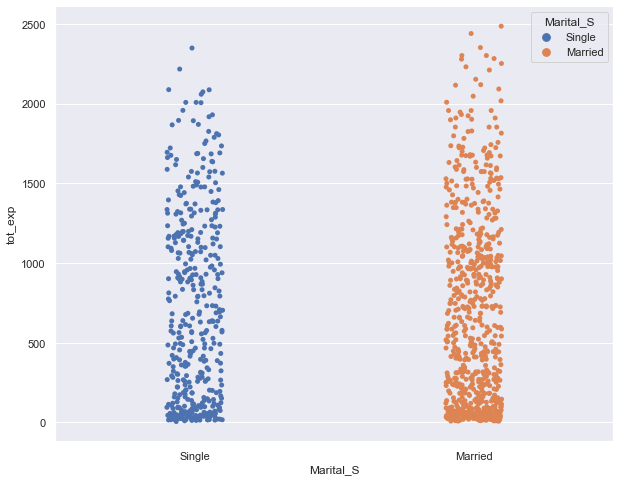

In [164]:
#sns.boxplot(x = 'Marital_S', y = 'tot_exp', data = df1[df1['Age_Cat'] == 'Old Adult'][['Marital_S', 'tot_exp']], hue = 'Marital_S')
sns.stripplot(x = 'Marital_S', y = 'tot_exp', data = df1[df1['Age_Cat'] == 'Old Adult'][['Marital_S', 'tot_exp']], hue = 'Marital_S')

<AxesSubplot: xlabel='Age_Cat', ylabel='tot_exp'>

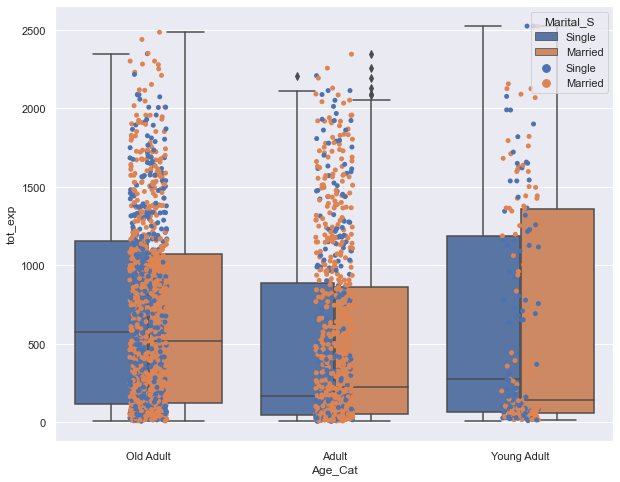

In [165]:
sns.boxplot(x = 'Age_Cat', y = 'tot_exp', data = df1, hue =  'Marital_S')
sns.stripplot(x = 'Age_Cat', y = 'tot_exp', data = df1, hue =  'Marital_S')

## Heirarchial Clustering

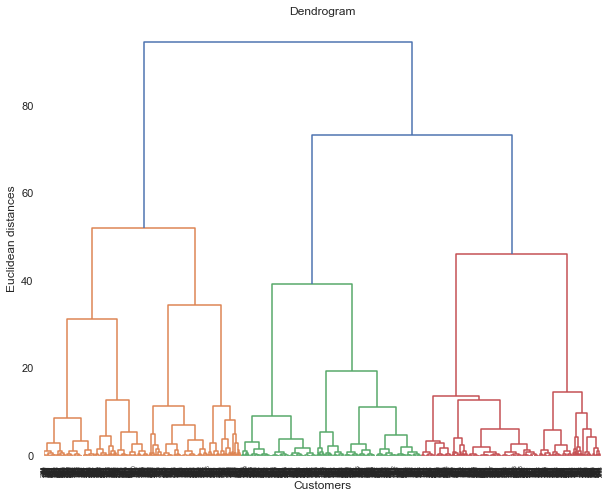

In [166]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [167]:
from sklearn.cluster import AgglomerativeClustering
for i in range(4,50):
      hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
      y_hc = hc.fit(X_train)
      silhouette_score_average = silhouette_score(X_train, y_hc.fit_predict(X_train))

        #lets see what that score it
      print('the score for {} clusters is '.format(i), silhouette_score_average)
      #wcss1.append(kmeans_pca.inertia_)

the score for 4 clusters is  0.5126967463058948
the score for 5 clusters is  0.5291667740174706
the score for 6 clusters is  0.5409209132127467
the score for 7 clusters is  0.5651217491031689
the score for 8 clusters is  0.5872362544069377
the score for 9 clusters is  0.5806989225114012
the score for 10 clusters is  0.5569687265384923
the score for 11 clusters is  0.5311254514884074
the score for 12 clusters is  0.5223403352527002
the score for 13 clusters is  0.5515938741148367
the score for 14 clusters is  0.5394148051596649
the score for 15 clusters is  0.5468451953792793
the score for 16 clusters is  0.538299333251886
the score for 17 clusters is  0.5497939520162124
the score for 18 clusters is  0.5546031094540486
the score for 19 clusters is  0.5525941034197056
the score for 20 clusters is  0.560819600692073
the score for 21 clusters is  0.5543384211117791
the score for 22 clusters is  0.5558046343651065
the score for 23 clusters is  0.5442993891259401
the score for 24 clusters is

In [168]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit(X_train)

In [169]:
final_df['hc_labels']  = y_hc.labels_

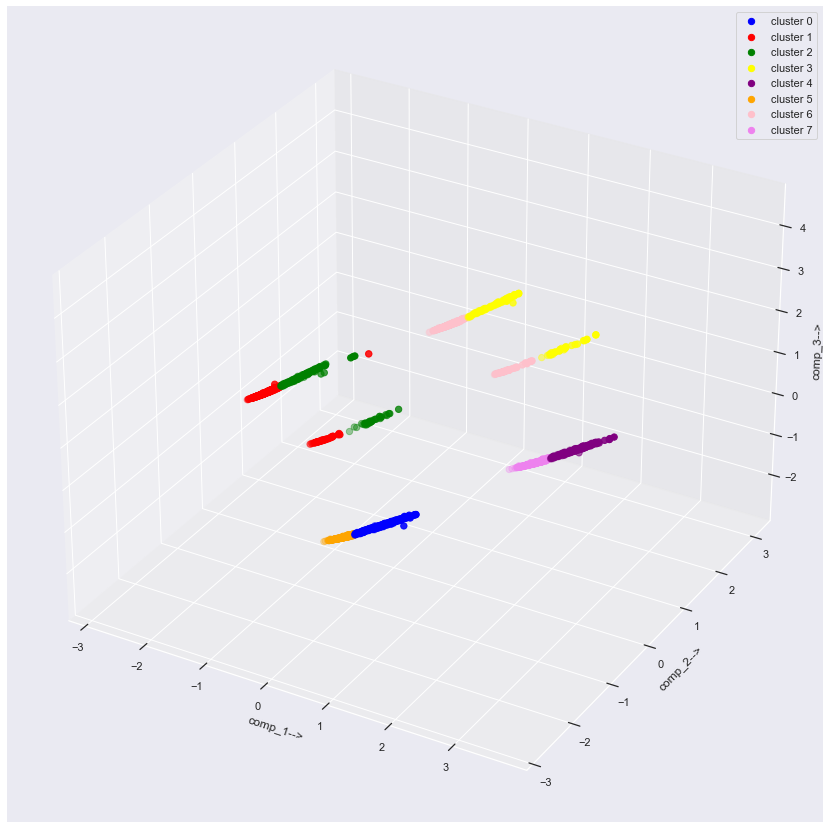

In [170]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_df[final_df['hc_labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(final_df[final_df['hc_labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(final_df[final_df['hc_labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(final_df[final_df['hc_labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'yellow', label = "cluster 3")
ax.scatter(final_df[final_df['hc_labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(final_df[final_df['hc_labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'orange', label = "cluster 5")
ax.scatter(final_df[final_df['hc_labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'pink', label = "cluster 6")
ax.scatter(final_df[final_df['hc_labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['hc_labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['hc_labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'violet', label = "cluster 7")
ax.set_xlabel('comp_1-->')
ax.set_ylabel('comp_2-->')
ax.set_zlabel('comp_3-->')
ax.legend()
plt.show()

In [171]:
silhouette_score_average = silhouette_score(X_train, y_hc.fit_predict(X_train))
#lets see what that score it
print('silhouette_score_average for heirarchial clustering:', silhouette_score_average)

silhouette_score_average for heirarchial clustering: 0.5872362544069377


## Gaussian Mixture

In [172]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8)
gmm.fit(X_train)

GaussianMixture(n_components=8)

In [173]:
gmm.fit_predict(X_train)

array([3, 6, 7, ..., 5, 7, 1], dtype=int64)

In [174]:
final_df['gmm_labels'] = gmm.predict(X_train)

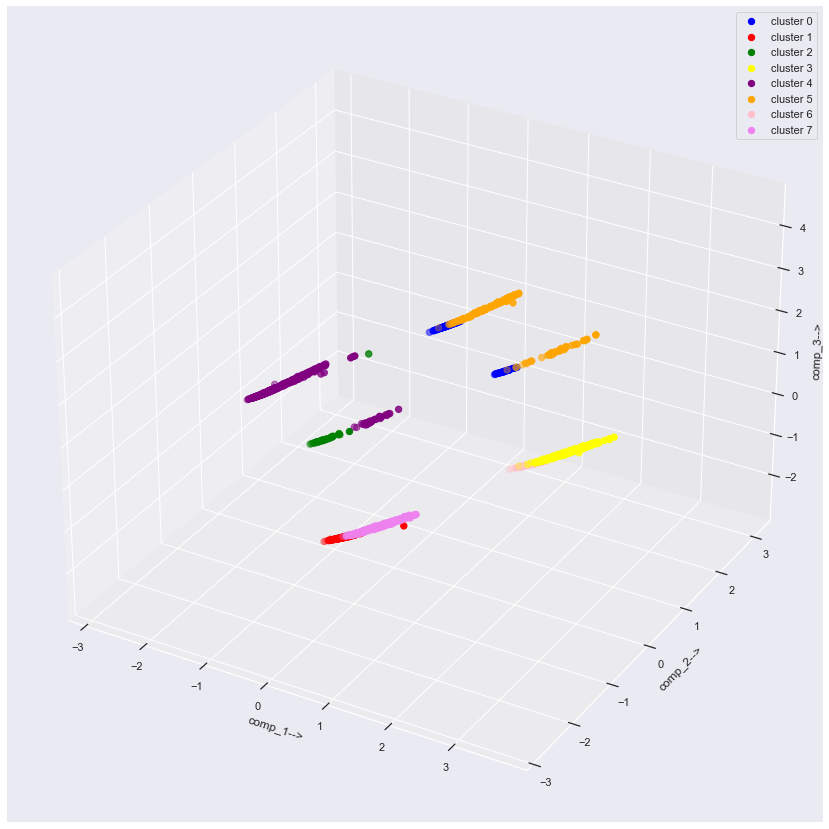

In [175]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_df[final_df['gmm_labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 0][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(final_df[final_df['gmm_labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 1][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(final_df[final_df['gmm_labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 2][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(final_df[final_df['gmm_labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 3][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'yellow', label = "cluster 3")
ax.scatter(final_df[final_df['gmm_labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 4][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(final_df[final_df['gmm_labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 5][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'orange', label = "cluster 5")
ax.scatter(final_df[final_df['gmm_labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 6][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'pink', label = "cluster 6")
ax.scatter(final_df[final_df['gmm_labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 0],final_df[final_df['gmm_labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 1], 
           final_df[final_df['gmm_labels'] == 7][['comp_1', 'comp_2', 'comp_3']].iloc[:, 2], s = 40 , color = 'violet', label = "cluster 7")
ax.set_xlabel('comp_1-->')
ax.set_ylabel('comp_2-->')
ax.set_zlabel('comp_3-->')
ax.legend()
plt.show()

In [176]:
silhouette_score_average = silhouette_score(X_train, gmm.fit_predict(X_train))

#lets see what that score it
print('silhouette_score_average of gaussian mixture model is :', silhouette_score_average)

silhouette_score_average of gaussian mixture model is : 0.3507342357079547


## apriori

In [177]:
df.iloc[:, 2:15]

Education Marital_Status   Income  Kids  Teen Customer_Dt  \
0     Graduation         Single  58138.0     0     0  04-09-2019   
1     Graduation         Single  46344.0     1     1  08-03-2021   
2     Graduation       Together  71613.0     0     0  21-08-2020   
3     Graduation       Together  26646.0     1     0  10-02-2021   
4            PhD        Married  58293.0     1     0  19-01-2021   
...          ...            ...      ...   ...   ...         ...   
2235  Graduation        Married  61223.0     0     1  13-06-2020   
2236         PhD       Together  64014.0     2     1  10-06-2021   
2237  Graduation       Divorced  56981.0     0     0  25-01-2021   
2238      Master       Together  69245.0     0     1  24-01-2021   
2239         PhD        Married  52869.0     1     1  15-10-2019   

      Last_purchase  Wines  Fruits  MeatProducts  FishProducts  SweetProducts  \
0                58    635      88           546           172             88   
1                38     11       1             6             2              1   
2                26    426      49           127           111             21   
3                26     11       4            20            10              3   
4                94    173      43           118            46             27   
...             ...    ...     ...           ...           ...            ...   
2235             46    709      43           182            42            118   
2236             56    406       0            30             0              0   
2237             91    908      48           217            32             12   
2238              8    428      30           214            80             30   
2239             40     84       3            61             2              1   

      GoldProds  
0            88  
1             6  
2            42  
3             5  
4            15  
...         ...  
2235        247  
2236          8  
2237         24  
2238         61  
2239         21  

[2239 rows x 13 columns]

In [178]:
df1.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kids',
       'Teen', 'Customer_Dt', 'Last_purchase', 'Wines', 'Fruits',
       'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds',
       'NumDealsPurchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'WebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Marital_S', 'Age', 'Age_Cat', 'tot_exp', 'Kids_Teen', 'tot_purchases',
       'tot_cam', 'isIncome', 'labels'],
      dtype='object')

In [179]:
df1['labels'] = final_df['labels']

In [180]:
def  extra_person(a):
    if a['Kids_Teen'] == 0:
        return 'no_person'
    if a['Kids_Teen'] == 1:
        return '1_person'
    if a['Kids_Teen'] == 2:
        return '2_person'
    if a['Kids_Teen'] == 3:
        return '3_person'
    

In [181]:
df1['mem'] = df1.apply( extra_person, axis = 1)

In [182]:
def more_visit(b):
    if b['WebVisitsMonth'] < 6:
        return 'less'
    else:
        return 'more'

In [183]:
df1['fre_visits'] = df1.apply(more_visit, axis = 1)

In [184]:
df1['isIncome'].value_counts()

Income < Average    1124
Income > Average    1115
Name: isIncome, dtype: int64

In [185]:
ap = df1[df1['labels'] == '3'][[ 'Wines', 'Education',  'Marital_S', 'Age_Cat',  'mem', 'fre_visits']]

In [186]:
df1['Kids_Teen'].value_counts()

1    1127
0     638
2     421
3      53
Name: Kids_Teen, dtype: int64

<AxesSubplot: ylabel='WebVisitsMonth'>

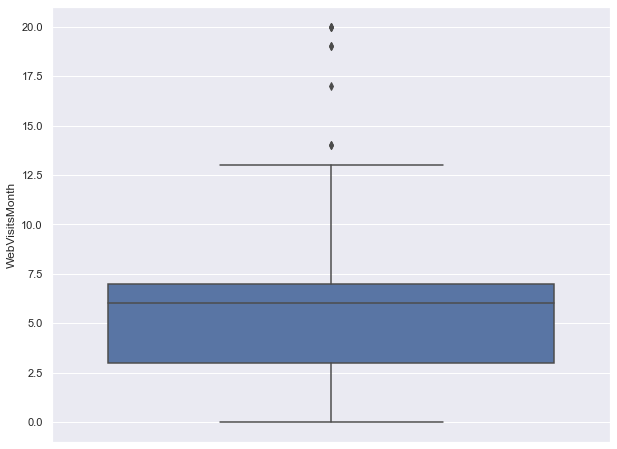

In [187]:
plt.figure()
sns.boxplot(y = df1['WebVisitsMonth'])

In [188]:
df1['WebVisitsMonth'].median()

6.0

<AxesSubplot: ylabel='Wines'>

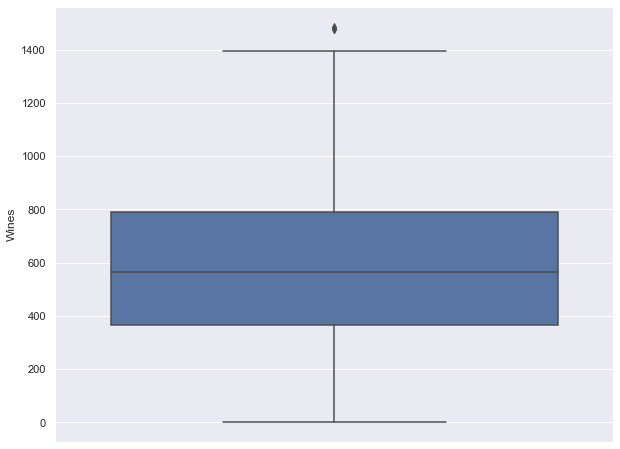

In [189]:
plt.figure()
sns.boxplot(y = ap['Wines'])

In [190]:
print("Q1 quantile of arr : ", np.quantile(ap['Wines'], .25))
print("Q2 quantile of arr : ", np.quantile(ap['Wines'], .5))
print("Q3 quantile of arr : ", np.quantile(ap['Wines'], .75))
print("Q4 quantile of arr : ", np.quantile(ap['Wines'], .1))

Q1 quantile of arr :  366.0
Q2 quantile of arr :  563.0
Q3 quantile of arr :  790.0
Q4 quantile of arr :  238.4


##### >= Q3 very high spending

In [191]:
def ap_change1(ap):
    if ap['Wines'] < np.quantile(ap['Wines'], .75):
        return 'more_than_avg_on_wines'
    else:
        return 'very_high_spending_on_wines'

In [192]:
ap

Wines          Education Marital_S Age_Cat        mem fre_visits
40      421  level 1 Education   Married   Adult   1_person       less
54      328  level 1 Education   Married   Adult   2_person       less
61      452  level 1 Education   Married   Adult   2_person       less
73      565  level 2 Education   Married   Adult   2_person       more
76      721  level 2 Education   Married   Adult  no_person       less
...     ...                ...       ...     ...        ...        ...
2203    366  level 1 Education   Married   Adult   1_person       less
2206    269  level 1 Education   Married   Adult   1_person       more
2211    519  level 1 Education   Married   Adult  no_person       less
2226    457  level 1 Education   Married   Adult   2_person       more
2228     32  level 2 Education   Married   Adult  no_person       less

[245 rows x 6 columns]

In [193]:
ap['wines_score'] = ap.apply(ap_change1, axis = 1)

In [194]:
ap['wines_score'].value_counts()

very_high_spending_on_wines    245
Name: wines_score, dtype: int64

In [195]:
transactions = []
for i in range(0, 245):
    transactions.append([str(ap.values[i,j]) for j in range(1, 7)])

In [196]:
transactions

[['level 1 Education',
  'Married',
  'Adult',
  '1_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 1 Education',
  'Married',
  'Adult',
  '2_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 1 Education',
  'Married',
  'Adult',
  '2_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 2 Education',
  'Married',
  'Adult',
  '2_person',
  'more',
  'very_high_spending_on_wines'],
 ['level 2 Education',
  'Married',
  'Adult',
  'no_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 1 Education',
  'Married',
  'Adult',
  'no_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 2 Education',
  'Married',
  'Adult',
  'no_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 1 Education',
  'Married',
  'Adult',
  '1_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 1 Education',
  'Married',
  'Adult',
  '1_person',
  'less',
  'very_high_spending_on_wines'],
 ['level 2 Education',
  'Married',
  'Adult',
  '1_

In [197]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 5)

In [198]:
results = list(rules)

In [199]:
results

[]

In [200]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
#resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [201]:
def ap_sim(n):
    labeln_df = df1[df1['labels'] == str(n)][[ 'Wines', 'Education',  'Marital_S', 'Age_Cat',  'mem', 'isIncome',  'fre_visits']]
    transactions = []
    s = labeln_df.shape[0]
    for i in range(0, s):
        transactions.append([str(labeln_df.values[i,j]) for j in range(1, 5)])
    #print(transactions)
    rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.5, min_lift = 3, min_length = 2, max_length = 5)
    #print(list(rules))
    resultsinDataFrame = pd.DataFrame(inspect(list(rules)), columns = ['Left Hand Side', 'Right Hand Side',  'Support', 'Confidence', 'Lift'])
    return resultsinDataFrame
    
    

In [202]:
def run_for_all(arr):
    for i in arr:
        print('For cluster label {}'.format(i))
        print(ap_sim(i))
        print('==========================================')

In [203]:
arr = list(range(0, 8))

In [204]:
run_for_all(arr)

For cluster label 0
Empty DataFrame
Columns: [Left Hand Side, Right Hand Side, Support, Confidence, Lift]
Index: []
For cluster label 1
  Left Hand Side    Right Hand Side   Support  Confidence      Lift
0      no_person        Young Adult  0.029536    0.608696  4.579710
1           None  level 2 Education  0.004219    1.000000  3.314685
2      no_person            Married  0.029536    0.608696  4.579710
For cluster label 2
  Left Hand Side Right Hand Side   Support  Confidence        Lift
0          Adult          Single  0.003058         0.5  163.500000
1          Adult          Single  0.003058         0.5  163.500000
2          Adult       no_person  0.003058         0.5  163.500000
3         Single       no_person  0.003058         1.0    3.892857
4        Married        1_person  0.003058         1.0    4.671429
5          Adult          Single  0.003058         0.5  163.500000
For cluster label 3
Empty DataFrame
Columns: [Left Hand Side, Right Hand Side, Support, Confidence, Lif

In [205]:
ap_sim(4)

Left Hand Side Right Hand Side   Support  Confidence      Lift
0  level 2 Education       no_person  0.033195    0.571429  4.590476
1  level 2 Education       no_person  0.033195    0.571429  4.590476

In [206]:
df1[df1['labels'] == '0'][[ 'Wines', 'Education',  'Marital_S', 'Age_Cat',  'mem','isIncome',  'fre_visits']].value_counts()

Wines  Education          Marital_S  Age_Cat    mem        isIncome          fre_visits
112    level 2 Education  Single     Old Adult  1_person   Income < Average  more          3
437    level 2 Education  Single     Old Adult  no_person  Income < Average  more          2
23     level 2 Education  Single     Old Adult  2_person   Income < Average  more          2
16     level 1 Education  Single     Old Adult  1_person   Income < Average  more          2
50     level 1 Education  Single     Old Adult  2_person   Income < Average  more          2
                                                                                          ..
35     level 2 Education  Single     Old Adult  2_person   Income < Average  more          1
36     level 1 Education  Single     Old Adult  1_person   Income < Average  more          1
                                                2_person   Income < Average  less          1
37     level 2 Education  Single     Old Adult  1_person   Income < Average

<AxesSubplot: xlabel='labels', ylabel='FishProducts'>

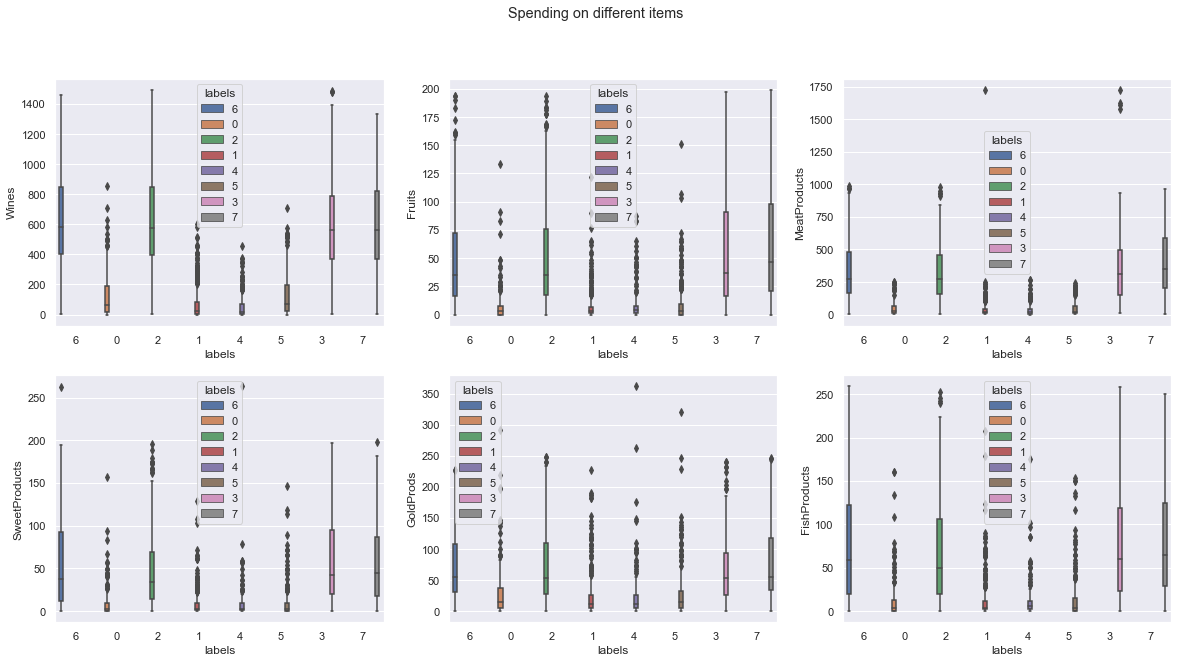

In [207]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

fig.suptitle('Spending on different items')

sns.boxplot(ax=axes[0, 0], data=df1, x='labels', y= 'Wines', hue = 'labels')
sns.boxplot(ax=axes[0, 1], data=df1, x='labels', y='Fruits',  hue = 'labels')
sns.boxplot(ax=axes[0, 2], data=df1, x='labels', y='MeatProducts',  hue = 'labels')
sns.boxplot(ax=axes[1, 0], data=df1, x='labels', y= 'SweetProducts',  hue = 'labels')
sns.boxplot(ax=axes[1, 1], data=df1, x='labels', y='GoldProds',  hue = 'labels')
sns.boxplot(ax=axes[1, 2], data=df1, x='labels', y= 'FishProducts',  hue = 'labels')

Text(0, 0.5, 'Spending on wines')

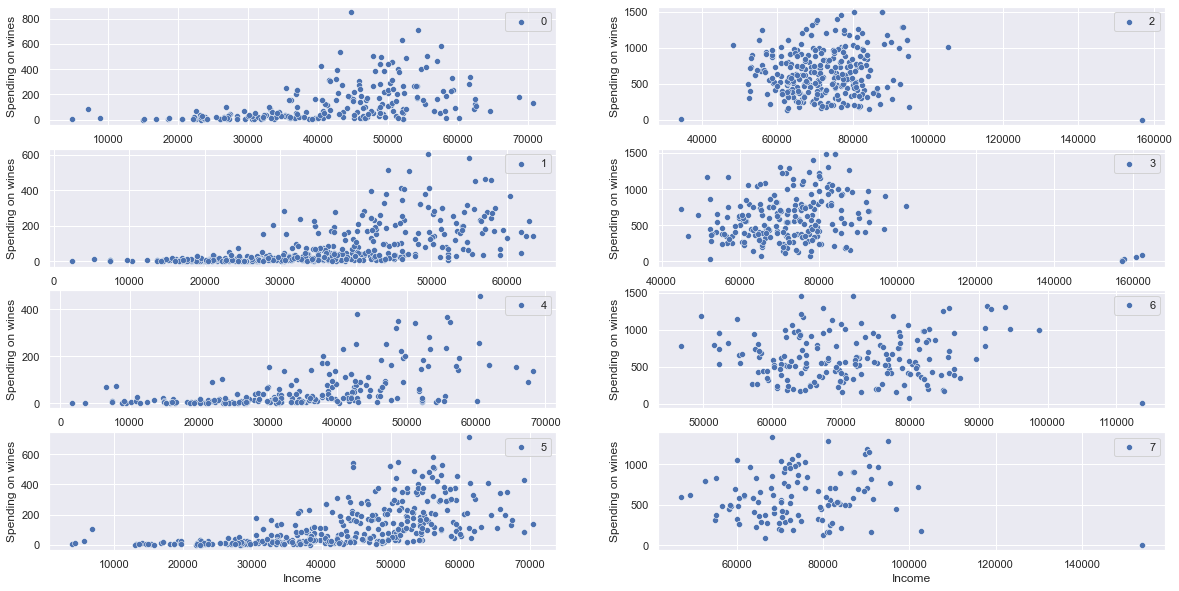

In [208]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
sns.scatterplot(ax=axes[0, 0], data=df1[df1['labels'] == '0'], x='Income', y= 'Wines', label = '0')
axes[0, 0].set_ylabel('Spending on wines')
sns.scatterplot(ax=axes[1, 0], data=df1[df1['labels'] == '1'], x='Income', y= 'Wines', label = '1')
axes[1, 0].set_ylabel('Spending on wines')
sns.scatterplot(ax=axes[2, 0], data=df1[df1['labels'] == '4'], x='Income', y= 'Wines', label = '4')
axes[2, 0].set_ylabel('Spending on wines')
sns.scatterplot(ax=axes[3, 0], data=df1[df1['labels'] == '5'], x='Income', y= 'Wines', label = '5')
axes[3, 0].set_ylabel('Spending on wines')
sns.scatterplot(ax=axes[0, 1], data=df1[df1['labels'] == '2'], x='Income', y= 'Wines', label = '2')
axes[0, 1].set_ylabel('Spending on wines')
sns.scatterplot(ax=axes[1, 1], data=df1[df1['labels'] == '3'], x='Income', y= 'Wines', label = '3')
axes[1, 1].set_ylabel('Spending on wines')
sns.scatterplot(ax=axes[2, 1], data=df1[df1['labels'] == '6'], x='Income', y= 'Wines', label = '6')
axes[2, 1 ].set_ylabel('Spending on wines')
sns.scatterplot(ax=axes[3, 1], data=df1[df1['labels'] == '7'], x='Income', y= 'Wines', label = '7')
axes[3,1].set_ylabel('Spending on wines')

Text(0, 0.5, 'Meat Exp')

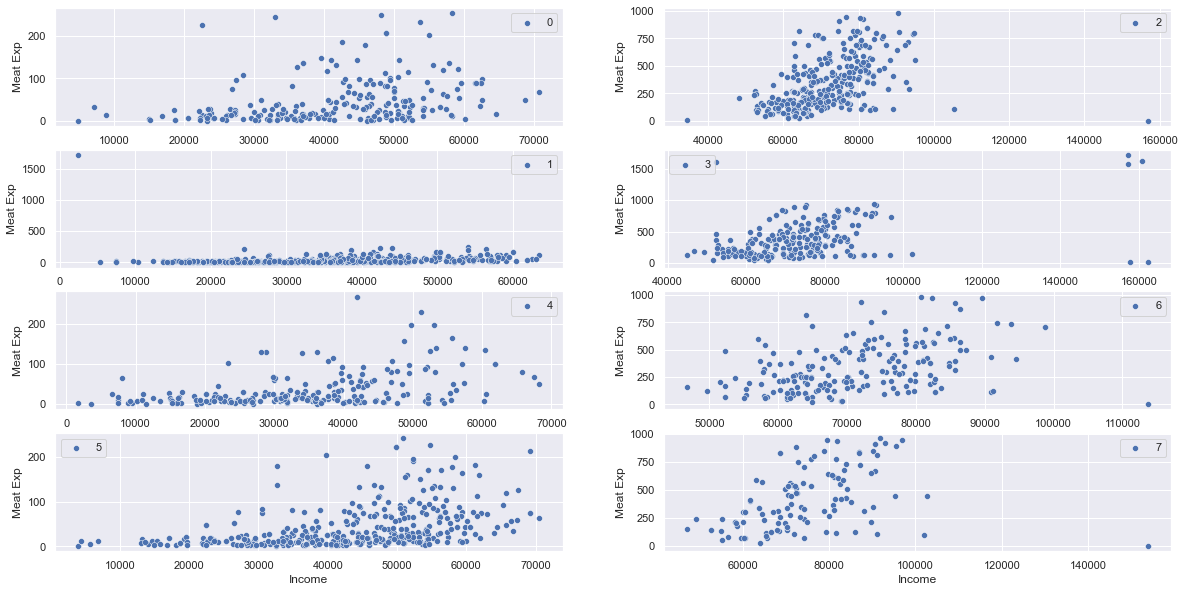

In [209]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
sns.scatterplot(ax=axes[0, 0], data=df1[df1['labels'] == '0'], x='Income', y= 'MeatProducts', label = '0')
axes[0, 0].set_ylabel('Meat Exp')
sns.scatterplot(ax=axes[1, 0], data=df1[df1['labels'] == '1'], x='Income', y= 'MeatProducts', label = '1')
axes[1, 0].set_ylabel('Meat Exp')
sns.scatterplot(ax=axes[2, 0], data=df1[df1['labels'] == '4'], x='Income', y= 'MeatProducts', label = '4')
axes[2, 0].set_ylabel('Meat Exp')
sns.scatterplot(ax=axes[3, 0], data=df1[df1['labels'] == '5'], x='Income', y= 'MeatProducts', label = '5')
axes[3, 0].set_ylabel('Meat Exp')
sns.scatterplot(ax=axes[0, 1], data=df1[df1['labels'] == '2'], x='Income', y= 'MeatProducts', label = '2')
axes[0, 1].set_ylabel('Meat Exp')
sns.scatterplot(ax=axes[1, 1], data=df1[df1['labels'] == '3'], x='Income', y= 'MeatProducts', label = '3')
axes[1, 1].set_ylabel('Meat Exp')
sns.scatterplot(ax=axes[2, 1], data=df1[df1['labels'] == '6'], x='Income', y= 'MeatProducts', label = '6')
axes[2, 1 ].set_ylabel('Meat Exp')
sns.scatterplot(ax=axes[3, 1], data=df1[df1['labels'] == '7'], x='Income', y= 'MeatProducts', label = '7')
axes[3,1].set_ylabel('Meat Exp')

Text(0, 0.5, 'Gold Exp')

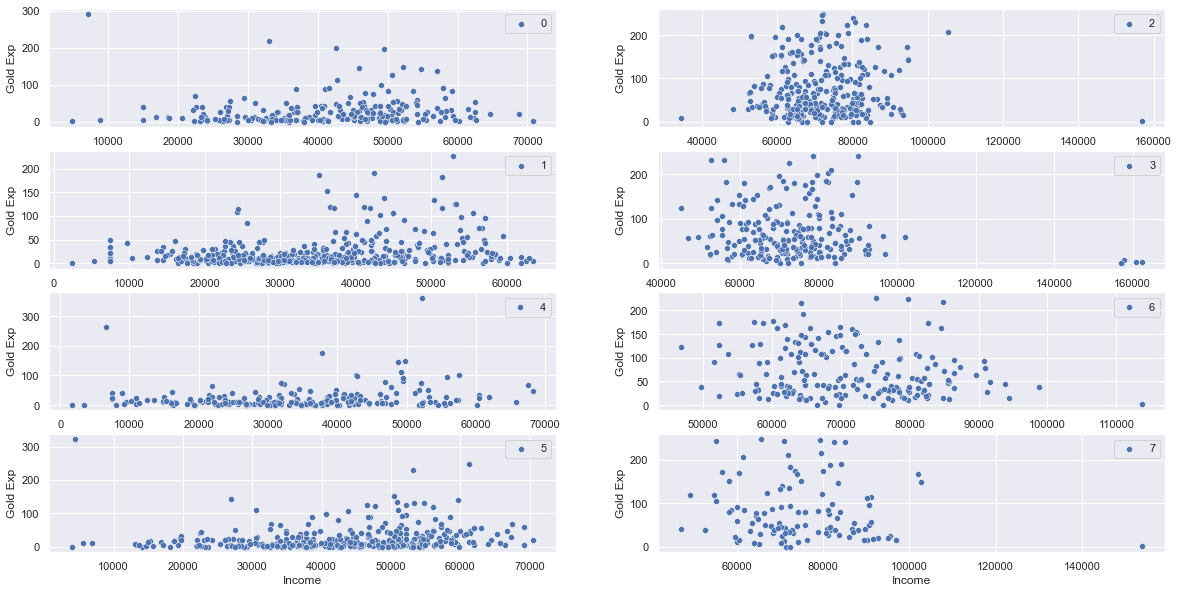

In [210]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
sns.scatterplot(ax=axes[0, 0], data=df1[df1['labels'] == '0'], x='Income', y= 'GoldProds', label = '0')
axes[0, 0].set_ylabel('Gold Exp')
sns.scatterplot(ax=axes[1, 0], data=df1[df1['labels'] == '1'], x='Income', y= 'GoldProds', label = '1')
axes[1, 0].set_ylabel('Gold Exp')
sns.scatterplot(ax=axes[2, 0], data=df1[df1['labels'] == '4'], x='Income', y= 'GoldProds', label = '4')
axes[2, 0].set_ylabel('Gold Exp')
sns.scatterplot(ax=axes[3, 0], data=df1[df1['labels'] == '5'], x='Income', y= 'GoldProds', label = '5')
axes[3, 0].set_ylabel('Gold Exp')
sns.scatterplot(ax=axes[0, 1], data=df1[df1['labels'] == '2'], x='Income', y= 'GoldProds', label = '2')
axes[0, 1].set_ylabel('Gold Exp')
sns.scatterplot(ax=axes[1, 1], data=df1[df1['labels'] == '3'], x='Income', y= 'GoldProds', label = '3')
axes[1, 1].set_ylabel('Gold Exp')
sns.scatterplot(ax=axes[2, 1], data=df1[df1['labels'] == '6'], x='Income', y= 'GoldProds', label = '6')
axes[2, 1 ].set_ylabel('Gold Exp')
sns.scatterplot(ax=axes[3, 1], data=df1[df1['labels'] == '7'], x='Income', y= 'GoldProds', label = '7')
axes[3,1].set_ylabel('Gold Exp')

Text(0, 0.5, 'Fruits Exp')

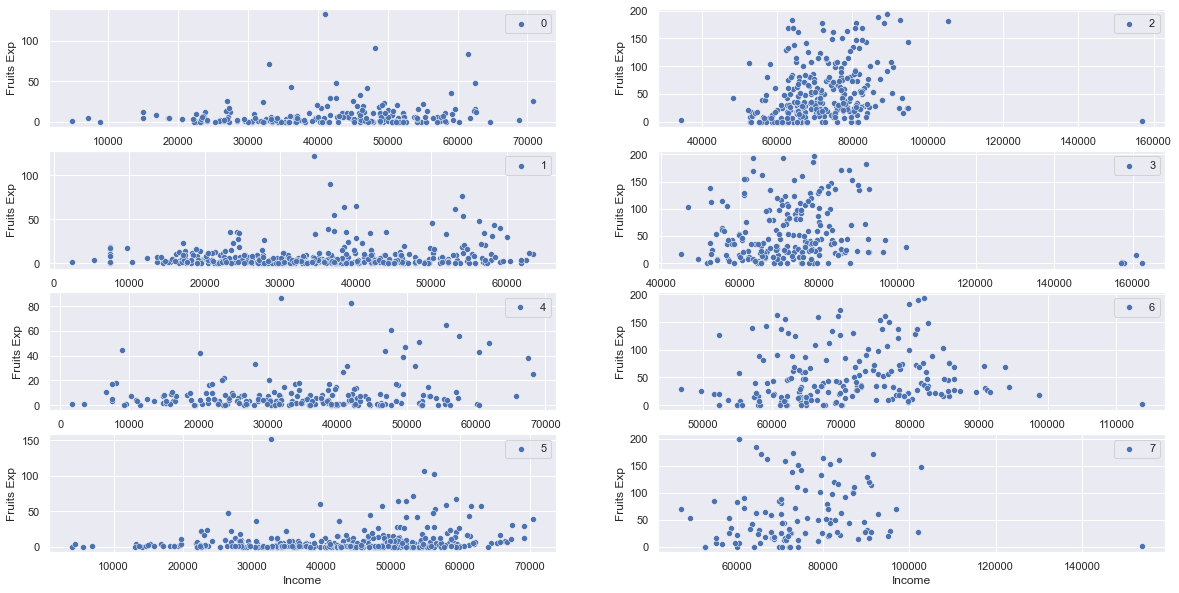

In [211]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
sns.scatterplot(ax=axes[0, 0], data=df1[df1['labels'] == '0'], x='Income', y= 'Fruits', label = '0')
axes[0, 0].set_ylabel('Fruits Exp')
sns.scatterplot(ax=axes[1, 0], data=df1[df1['labels'] == '1'], x='Income', y= 'Fruits', label = '1')
axes[1, 0].set_ylabel('Fruits Exp')
sns.scatterplot(ax=axes[2, 0], data=df1[df1['labels'] == '4'], x='Income', y= 'Fruits', label = '4')
axes[2, 0].set_ylabel('Fruits Exp')
sns.scatterplot(ax=axes[3, 0], data=df1[df1['labels'] == '5'], x='Income', y= 'Fruits', label = '5')
axes[3, 0].set_ylabel('Fruits Exp')
sns.scatterplot(ax=axes[0, 1], data=df1[df1['labels'] == '2'], x='Income', y= 'Fruits', label = '2')
axes[0, 1].set_ylabel('Fruits Exp')
sns.scatterplot(ax=axes[1, 1], data=df1[df1['labels'] == '3'], x='Income', y= 'Fruits', label = '3')
axes[1, 1].set_ylabel('Fruits Exp')
sns.scatterplot(ax=axes[2, 1], data=df1[df1['labels'] == '6'], x='Income', y= 'Fruits', label = '6')
axes[2, 1 ].set_ylabel('Fruits Exp')
sns.scatterplot(ax=axes[3, 1], data=df1[df1['labels'] == '7'], x='Income', y= 'Fruits', label = '7')
axes[3,1].set_ylabel('Fruits Exp')

Text(0, 0.5, 'Sweet Exp')

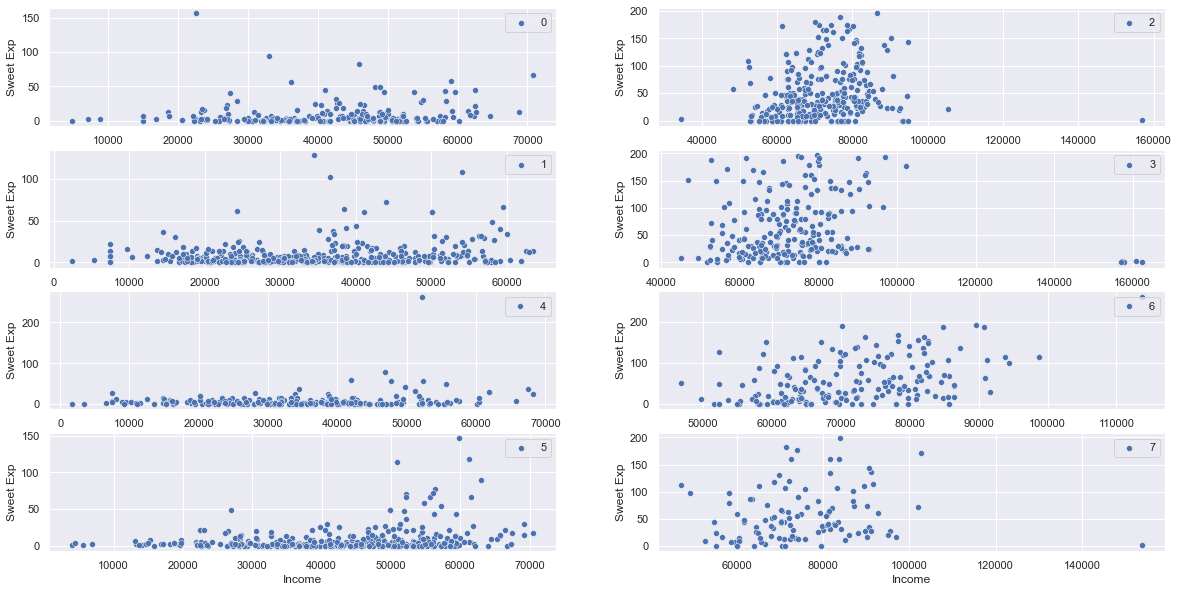

In [212]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
sns.scatterplot(ax=axes[0, 0], data=df1[df1['labels'] == '0'], x='Income', y= 'SweetProducts', label = '0')
axes[0, 0].set_ylabel('Sweet Exp')
sns.scatterplot(ax=axes[1, 0], data=df1[df1['labels'] == '1'], x='Income', y= 'SweetProducts', label = '1')
axes[1, 0].set_ylabel('Sweet Exp')
sns.scatterplot(ax=axes[2, 0], data=df1[df1['labels'] == '4'], x='Income', y= 'SweetProducts', label = '4')
axes[2, 0].set_ylabel('Sweet Exp')
sns.scatterplot(ax=axes[3, 0], data=df1[df1['labels'] == '5'], x='Income', y= 'SweetProducts', label = '5')
axes[3, 0].set_ylabel('Sweet Exp')
sns.scatterplot(ax=axes[0, 1], data=df1[df1['labels'] == '2'], x='Income', y= 'SweetProducts', label = '2')
axes[0, 1].set_ylabel('Sweet Exp')
sns.scatterplot(ax=axes[1, 1], data=df1[df1['labels'] == '3'], x='Income', y= 'SweetProducts', label = '3')
axes[1, 1].set_ylabel('Sweet Exp')
sns.scatterplot(ax=axes[2, 1], data=df1[df1['labels'] == '6'], x='Income', y= 'SweetProducts', label = '6')
axes[2, 1 ].set_ylabel('Sweet Exp')
sns.scatterplot(ax=axes[3, 1], data=df1[df1['labels'] == '7'], x='Income', y= 'SweetProducts', label = '7')
axes[3,1].set_ylabel('Sweet Exp')

Text(0, 0.5, 'Fish Exp')

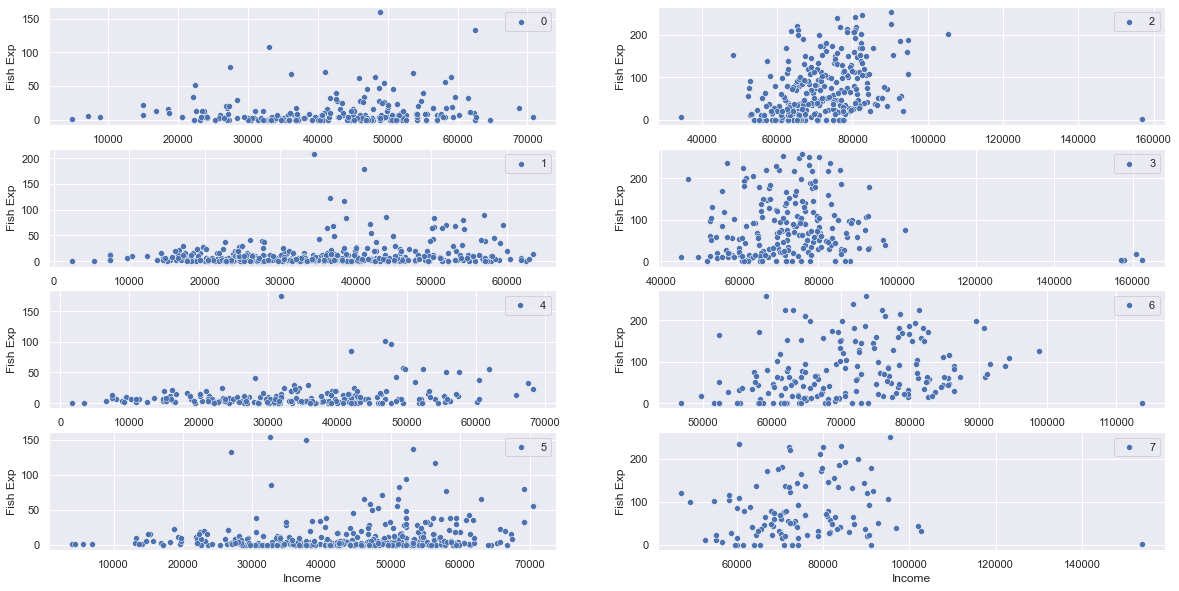

In [213]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
sns.scatterplot(ax=axes[0, 0], data=df1[df1['labels'] == '0'], x='Income', y= 'FishProducts', label = '0')
axes[0, 0].set_ylabel('Fish Exp')
sns.scatterplot(ax=axes[1, 0], data=df1[df1['labels'] == '1'], x='Income', y= 'FishProducts', label = '1')
axes[1, 0].set_ylabel('Fish Exp')
sns.scatterplot(ax=axes[2, 0], data=df1[df1['labels'] == '4'], x='Income', y= 'FishProducts', label = '4')
axes[2, 0].set_ylabel('Fish Exp')
sns.scatterplot(ax=axes[3, 0], data=df1[df1['labels'] == '5'], x='Income', y= 'FishProducts', label = '5')
axes[3, 0].set_ylabel('Fish Exp')
sns.scatterplot(ax=axes[0, 1], data=df1[df1['labels'] == '2'], x='Income', y= 'FishProducts', label = '2')
axes[0, 1].set_ylabel('Fish Exp')
sns.scatterplot(ax=axes[1, 1], data=df1[df1['labels'] == '3'], x='Income', y= 'FishProducts', label = '3')
axes[1, 1].set_ylabel('Fish Exp')
sns.scatterplot(ax=axes[2, 1], data=df1[df1['labels'] == '6'], x='Income', y= 'FishProducts', label = '6')
axes[2, 1 ].set_ylabel('Fish Exp')
sns.scatterplot(ax=axes[3, 1], data=df1[df1['labels'] == '7'], x='Income', y= 'FishProducts', label = '7')
axes[3,1].set_ylabel('Fish Exp')